# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a> qui a pour but de mettre à disposition des consommateurs les données des produits alimentaires. Pour une meilleure compréhension des données, une description est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, le service R&D développe un outil permetant de rééquilibrer les habitudes alimentaire. Le but est de restranscrire les repas en informations nutritionnelles afin de proposer des menus plus équilibrés. Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (Régime alimentaire, allergies, ...)
5. Proposition de menus respectants les ANC et les Apports Journaliers recommandés (AJR)

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook de nettoyage:**
1. Description des données
2. Nettoyage des données
   1. *Suppression des données inexploitables*
   2. *Sélection des produits francophones*
   3. *Gestion des colonnes par section*
      1. *Informations sur la fiche produit*
      2. *Tags*
      3. *Ingrédients et additifs éventuels*
      4. *Informations nutritionnelles*
   4. *Traitement des informations nutritionnelles*
3. Imputation des données manquantes (nutriments)
   1. *Moyenne par colonne*
   2. *Moyenne par catégorie*
   3. *KNN-Imputer*

**Notebook d'analyse:**

4. Analyse statistique des données

## **0. Importation des librairies et des données**
---

In [1]:
# import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from matplotlib.ticker import ScalarFormatter

In [2]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

### Charte graphique

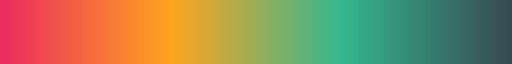

In [4]:
# Define the color
first_color = "#EB2D5F"  # Couleur pour les valeurs inférieures
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 100
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

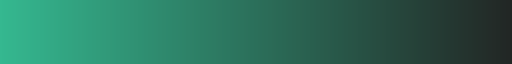

In [5]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.135501472720115, 0.15379014441096242, 0.14603572984787294),
 (0.13607109212590074, 0.15826084112781297, 0.1493323452219286),
 (0.1363559018287936, 0.16049618948623823, 0.1509806529089564),
 (0.13692552123457932, 0.16496688620308878, 0.15427726828301208),
 (0.1372103309374722, 0.16720223456151403, 0.1559255759700399),
 (0.1377799503432579, 0.17167293127836458, 0.15922219134409554),
 (0.13834956974904364, 0.1761436279952151, 0.16251880671815122),
 (0.1386343794519365, 0.17837897635364036, 0.16416711440517903),
 (0.13920399885772222, 0.1828496730704909, 0.16746372977923468),
 (0.13948880856061507, 0.18508502142891617, 0.16911203746626252),
 (0.1400584279664008, 0.18955571814576672, 0.17240865284031817),
 (0.14062804737218654, 0.19402641486261724, 0.17570526821437382),
 (0.1409128570750794, 0.1962617632210425, 0.17735357590140166),
 (0.14148247648086512, 0.20073245993789304, 0.1806501912754573),
 (0.14176728618375797, 0.2029678082963183, 0.18229849896248512),
 (0.1423369055895437, 0.20743850501316885, 0.1855951143365408),
 (0.14290652499532944, 0.21190920173001937, 0.18889172971059645),
 (0.1431913346982223, 0.21414455008844463, 0.19054003739762426),
 (0.14376095410400802, 0.21861524680529518, 0.19383665277167994),
 (0.14404576380690087, 0.22085059516372046, 0.19548496045870775),
 (0.1446153832126866, 0.22532129188057098, 0.1987815758327634),
 (0.14490019291557946, 0.22755664023899624, 0.20042988351979124),
 (0.1454698123213652, 0.2320273369558468, 0.2037264988938469),
 (0.14603943172715092, 0.23649803367269734, 0.20702311426790254),
 (0.14632424143004377, 0.2387333820311226, 0.20867142195493038),
 (0.1468938608358295, 0.24320407874797312, 0.21196803732898603),
 (0.14717867053872236, 0.24543942710639838, 0.21361634501601387),
 (0.1477482899445081, 0.24991012382324893, 0.21691296039006952),
 (0.14831790935029382, 0.2543808205400995, 0.22020957576412517),
 (0.14860271905318667, 0.25661616889852473, 0.221857883451153),
 (0.1491723384589724, 0.26108686561537525, 0.22515449882520866),
 (0.14945714816186526, 0.2633222139738005, 0.2268028065122365),
 (0.150026767567651, 0.26779291069065103, 0.23009942188629212),
 (0.1505963869734367, 0.2722636074075016, 0.2333960372603478),
 (0.15088119667632957, 0.27449895576592687, 0.23504434494737564),
 (0.1514508160821153, 0.2789696524827774, 0.23834096032143126),
 (0.15173562578500815, 0.2812050008412027, 0.2399892680084591),
 (0.1523052451907939, 0.2856756975580532, 0.24328588338251478),
 (0.1528748645965796, 0.29014639427490374, 0.2465824987565704),
 (0.15315967429947247, 0.29238174263332906, 0.24823080644359824),
 (0.15372929370525817, 0.2968524393501795, 0.25152742181765386),
 (0.15401410340815105, 0.2990877877086048, 0.2531757295046817),
 (0.15458372281393679, 0.30355848442545535, 0.2564723448787374),
 (0.15486853251682964, 0.3057938327838806, 0.2581206525657652),
 (0.15543815192261537, 0.31026452950073113, 0.2614172679398209),
 (0.15600777132840107, 0.31473522621758165, 0.2647138833138765),
 (0.15629258103129395, 0.31697057457600697, 0.26636219100090436),
 (0.15686220043707966, 0.3214412712928575, 0.26965880637496),
 (0.15714701013997254, 0.32367661965128275, 0.2713071140619878),
 (0.15771662954575827, 0.3281473163681333, 0.2746037294360435),
 (0.15828624895154397, 0.33261801308498384, 0.2779003448100992),
 (0.15857105865443683, 0.33485336144340905, 0.27954865249712696),
 (0.15914067806022256, 0.3393240581602596, 0.28284526787118264),
 (0.15942548776311544, 0.3415594065186849, 0.2844935755582104),
 (0.15999510716890114, 0.3460301032355354, 0.2877901909322661),
 (0.16056472657468687, 0.3505007999523859, 0.2910868063063218),
 (0.16084953627757972, 0.35273614831081124, 0.2927351139933496),
 (0.16141915568336546, 0.35720684502766176, 0.29603172936740524),
 (0.1617039653862583, 0.359442193386087, 0.2976800370544331),
 (0.16227358479204404, 0.3639128901029376, 0.3009766524284887),
 (0.16255839449493692, 0.3661482384613628, 0.302624

In [7]:
# Reverse the order of colours in the palette list
palette_map = list(reversed(palette_map))

## **1. Description des données**
***

In [8]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [9]:
# View random data
df_food.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
250897,3701002400818,http://world-fr.openfoodfacts.org/produit/3701...,openfoodfacts-contributors,1479559028,2016-11-19T12:37:08Z,1486908579,2017-02-12T14:09:39Z,Riz au lait à la vanille,NaN,100g,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
118510,0613008740917,http://world-fr.openfoodfacts.org/produit/0613...,usda-ndb-import,1489073634,2017-03-09T15:33:54Z,1489073634,2017-03-09T15:33:54Z,Green Tea With Ginseng And Honey,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
295245,7613331204806,http://world-fr.openfoodfacts.org/produit/7613...,openfood-ch-import,1486502495,2017-02-07T21:21:35Z,1487256605,2017-02-16T14:50:05Z,Frischkäse Nature,NaN,300 g,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,NaN,NaN


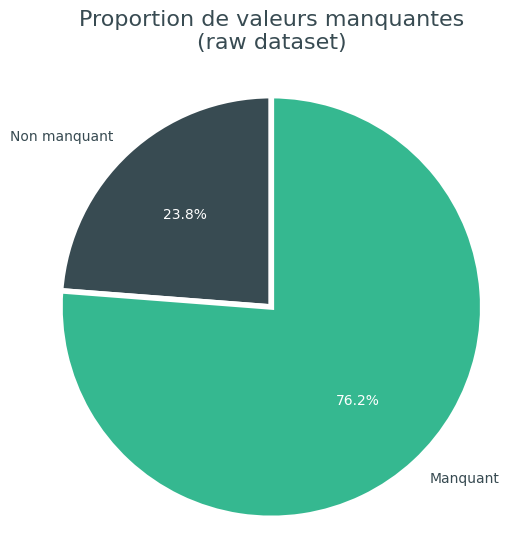

In [10]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(raw dataset)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

In [11]:
# Information on data quality
print("Nb de colonne: {}".format(df_food.shape[1]))
print("Nb de colonne sans données: {}".format(df_food.columns[df_food.isnull().all()].shape[0]))
print("Nb de produits: {}".format(df_food.shape[0]))
print("Nb de lignes sans données : {}".format(df_food.isna().all(axis=1).sum()))
print("Nb de lignes dupliquées : {}".format(df_food.duplicated().sum()))
print("Nb d'identifiant uniques dupliqués' : {}".format(df_food["code"].duplicated().sum()))

Nb de colonne: 162
Nb de colonne sans données: 16
Nb de produits: 320772
Nb de lignes sans données : 0
Nb de lignes dupliquées : 0
Nb d'identifiant uniques dupliqués' : 22


## **2. Nettoyage des données**
***

Dans un premier temps, il s'agit de supprimer les variables inutiles et les données qui ne comportent pas suffisemment d'informations pour être exploiter. Un seuil de 25% de données disponible est fixé pour la sélection des variables. Afin de promouvoir les produits locaux, seul les produits issus des territoires français seront sélectionnés.

### **1. Suppression des données inexploitables**

Pour commencer, les colonnes n'ayant aucune valeurs sont supprimées.

In [12]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

In [13]:
df_food.dropna(axis=1, how="all", inplace=True)

Puis, l'analyse du taux de remplissage des données permet de visualiser la qualité du jeu de donnée et d'observer les colonnes concernés par le seuil de 25% établis précédemment.

In [14]:
# Instantiation of the percentage of missing values for each column
null_value_rates = df_food.notnull().mean()*100
# Missing data formatted as a DataFrame (in descending order)
df_null_values = pd.DataFrame({"column_name":df_food.columns,"null_value_rates":null_value_rates.values})
df_null_values = df_null_values.sort_values(by="null_value_rates",ascending=False)

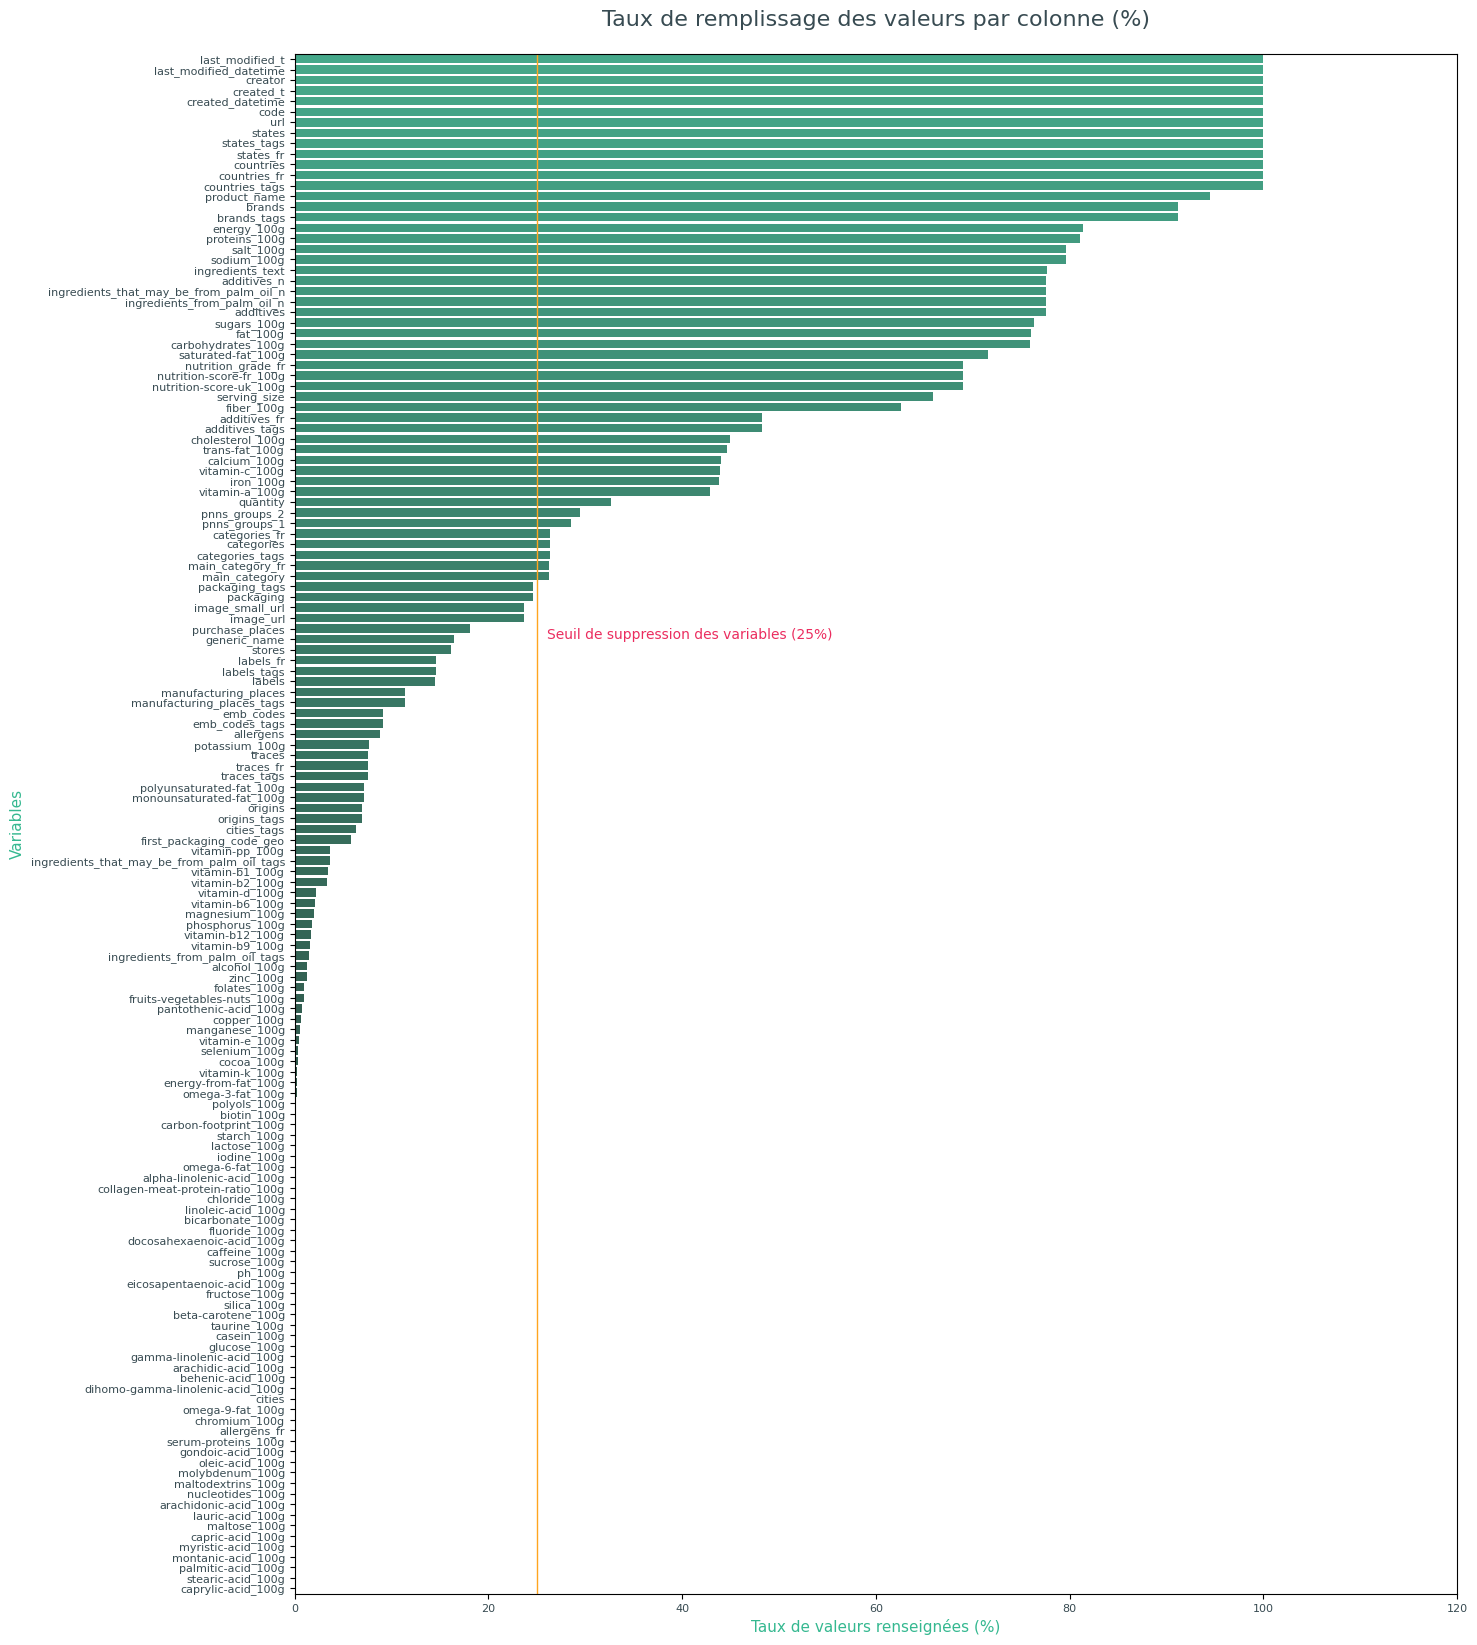

In [15]:
# Observation of zero values (average per column)
plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage des valeurs par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=25, linewidth=1, color = '#ffa51f')
plt.text(25+1, 55, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Brève analyse des colonnes ne respectant pas le seuil de 25% afin d'identifier la présence d'informations pertinentes avant leur suppressions.

In [16]:
# Check columns containing < 75% null values and uncontaing "100g"
nan_more_75_quali = df_food.loc[:, (df_food.isna().mean() > 0.75) & (~df_food.columns.str.contains("100g"))].columns
nan_more_75_quali

Index(['generic_name', 'packaging', 'packaging_tags', 'origins',
       'origins_tags', 'manufacturing_places', 'manufacturing_places_tags',
       'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places',
       'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags',
       'traces_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'image_url',
       'image_small_url'],
      dtype='object')

In [17]:
# Check columns containing < 75% null values and containg "100g"
nan_more_75_quanti = df_food.loc[:, (df_food.isna().mean() > 0.75) & (df_food.columns.str.contains("100g"))].columns
nan_more_75_quanti

Index(['energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g',
       'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
       'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g',
       'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       'oleic-acid_100g', 'gondoic-acid_100g', 'sucrose_100g', 'glucose_100g',
       'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g',
       'starch_100g', 'polyols_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'alcohol_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 

In [18]:
# Calculate the number of columns with more than 75% null values
nan_more_75_quali = nan_more_75_quali.value_counts().sum()
nan_more_75_quanti = nan_more_75_quanti.value_counts().sum()
# Calculate the percent of columns with more than 75% null values
nan_more_75_quali_percent = (nan_more_75_quali / df_food.columns.str.contains("100g").sum()) * 100
nan_more_75_quanti_percent = (nan_more_75_quanti / df_food.columns.str.contains("100g").sum()) * 100

print("{} colonne qualitative > 75% de valeurs manquantes, soit {:.2f}%".format(nan_more_75_quali, nan_more_75_quali_percent))
print("{} colonne nutriments > 75% de valeurs manquantes, soit {:.2f}%".format(nan_more_75_quanti, nan_more_75_quanti_percent))

26 colonne qualitative > 75% de valeurs manquantes, soit 29.89%
70 colonne nutriments > 75% de valeurs manquantes, soit 80.46%


In [19]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]].sample(5)

,code,allergens
177816,20091170,"Vollmilchpulver, Weizenmehl, Laktose, Magermil..."
217884,3266191006543,"Sésame, sésame"
178410,20172718,"Hartweizengrieß, Weizenmehl, VoIIei, Molkeneiw..."
213164,3257984410845,"oeuf, moutarde, moutarde"
305058,8032956078071,"Lait, crème"


In [20]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]].sample(5)

,code,ingredients_from_palm_oil_tags
292278,7613034678515,huile-de-palme
316425,8801128542661,huile-de-palme
294500,7613269716587,huile-de-palme
313397,8710445018073,huile-de-palme
195836,3162050019689,huile-de-palme


In [21]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]].sample(5)

,code,traces_fr
188837,3027030047482,"Œufs,Fruits à coque"
220138,3270190190486,Soja
211660,3256225718290,"Céleri,Crustacés,Fruits à coque,Graines de sésame"
303705,8008698010259,Lupin
320118,9336529001084,en:Crustacea


La vérification des colonnes qui ne respectent pas le seuil de 25% de données renseignées permet d'identifier 3 variables pertinentes. Ainsi, les informations sur les allergènes, les traces éventuelles de produits connexes et la présence d'huile de palme sont sauvegardés. La présence d'un grand nombre de valeurs manquantes pour ces variables n'est pas synonyme d'un manque d'information mais signifie que peu de produits sont concernés par ces informations.

In [22]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","traces_fr","ingredients_from_palm_oil_tags"]

La suppression des colonnes qui ne respecte pas le seuil de 25% peut maintenant être effectuée en conservant les 3 variables identifiées précedemment.

In [23]:
# Selection of columns containing < 75% null values and columns_to_keep
df_food = df_food.loc[:, (df_food.isna().mean() < 0.75) | (df_food.columns.isin(columns_to_keep))]

In [24]:
# Check columns
df_food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nu

In [25]:
# Selection of columns to be deleted
'''columns_to_deleted = ["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime",
                      "packaging","packaging_tags","brands","brands_tags","categories","categories_tags","countries","countries_tags","serving_size",
                      "additives_n","additives","additives_tags","ingredients_from_palm_oil_tags","ingredients_that_may_be_from_palm_oil_n","states","states_tags","states_fr",
                      "main_category","image_url","image_small_url","nutrition-score-uk_100g"]'''
# Select columns for analysis
'''df_food = df_food.drop(columns_to_deleted, axis=1)'''
# Check for zero values for the final data set
'''df_food.isna().mean().sort_values(ascending=False).plot.barh()'''

'df_food.isna().mean().sort_values(ascending=False).plot.barh()'

In [26]:
df_food.isna().mean().mean()*100

33.54334554679289

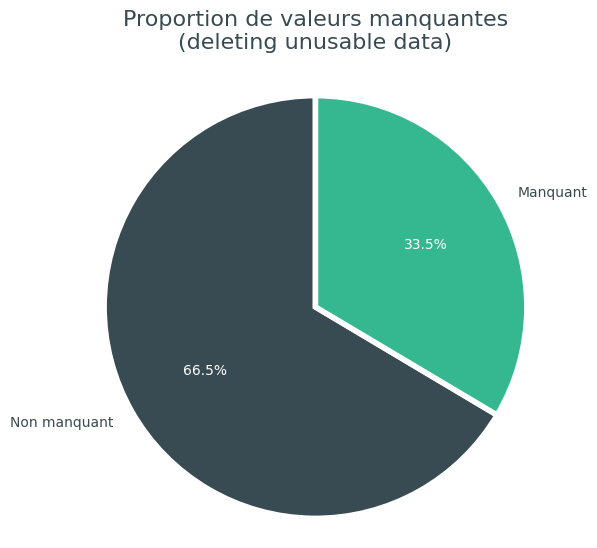

In [27]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(deleting unusable data)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **2. Sélection des produits francophones**

Maintenant que les données inexploitables sont écartées, la prochaine étapes consiste à sélectionner les produits issus des territoires français. Les territoires sont répertoriés sur le site web de l'INSEE à <a href="https://www.insee.fr/fr/metadonnees/definition/c1696">cette page</a> et serviront de référence pour filtrer les produits de la base de données.

Pour commencer, les lignes qui n'ont pas d'informations sur la provenance des produits sont supprimées.

In [28]:
# Delete rows for null values in countries_fr columns
df_food.dropna(subset="countries_fr", axis=0, inplace=True)

Puis les produits issus des territoires français sont sélectionnés afin d'obtenir un jeu de données conforme à nos besoins.

In [29]:
# Data selection for French countries only
df_food_fr = df_food.loc[df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

Il est également intéressant d'obtenir la proportion de produits issus des territoires français par rapport au reste du monde.

In [30]:
# Instanciation of the list of French territories
list_fr_countries = df_food_fr["countries_fr"].unique().tolist()

In [31]:
# Source categorisation function
def country_categ(country):
    if country in list_fr_countries:
      return "Territoires français"
    else:
      return "Reste du monde"

In [32]:
# Create a dataframe for analysis
df_proportion_french_products = pd.DataFrame(columns=["provenance"])
# Apply the function to obtain the origin of the products
df_proportion_french_products["provenance"] = df_food["countries_fr"].apply(country_categ)

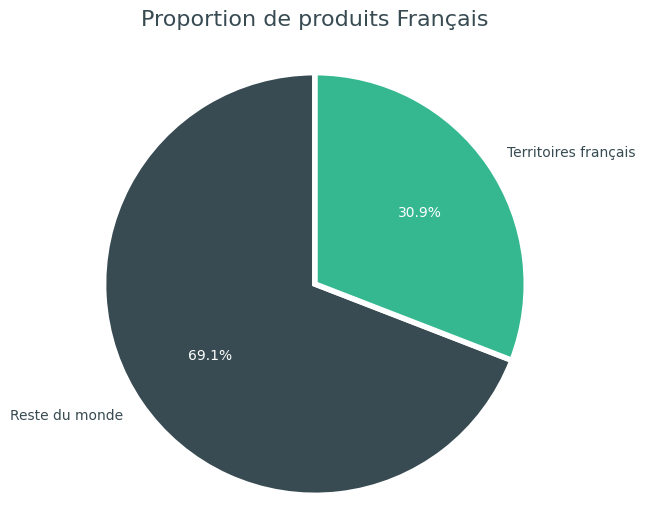

In [33]:
# Count the number of products by origin
provenance_counts = df_proportion_french_products["provenance"].value_counts()
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    provenance_counts, labels=provenance_counts.index,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits Français",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

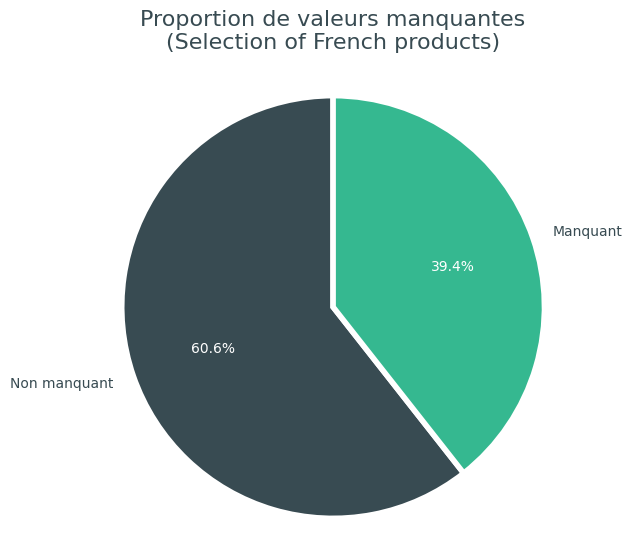

In [35]:
# Calculation of the average percentage of missing values
missing_percentage = df_food_fr.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(Selection of French products)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **3. Gestion des colonnes par section**

Les données inexploitables étant exclues, il est nécessaire de faire le tri des variables en sélectionnant les plus pertinentes pour le projet. Pour cela, la <a href="https://world.openfoodfacts.org/data/data-fields.txt">page de description des variables</a> sert de support méthodologique. Pour commencer, il est intéressant d'afficher la proportion des variables par catégorie. 

La page de description donne la liste des variables par catégorie, c'est sur ce modèle que les variables vont être réparties.

In [50]:
# Instantiation of columns by category
col_general_information = ["code","url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime","product_name","generic_name","quantity"]
col_tags = ["packaging","packaging_tags","brands","brands_tags","categories","categories_tags","categories_fr","origins","origins_tags","manufacturing_places","manufacturing_places_tags","labels","labels_tags","labels_fr","emb_codes","emb_codes_tags","first_packaging_code_geo","cities","cities_tags","purchase_places","stores","countries","countries_tags","countries_fr"]
col_ingredients = ["ingredients_text","traces","traces_tags"]
col_miscellaneous_data = ["serving_size","no_nutriments","additives_n","additives","additives_tags","ingredients_from_palm_oil_n","ingredients_from_palm_oil","ingredients_from_palm_oil_tags","ingredients_that_may_be_from_palm_oil_n","ingredients_that_may_be_from_palm_oil","ingredients_that_may_be_from_palm_oil_tags","nutrition_grade_fr","main_category","main_category_fr","image_url","image_small_url"]
col_nutrition_facts = df_food_fr.columns[df_food_fr.columns.str.contains("_100g")].tolist()

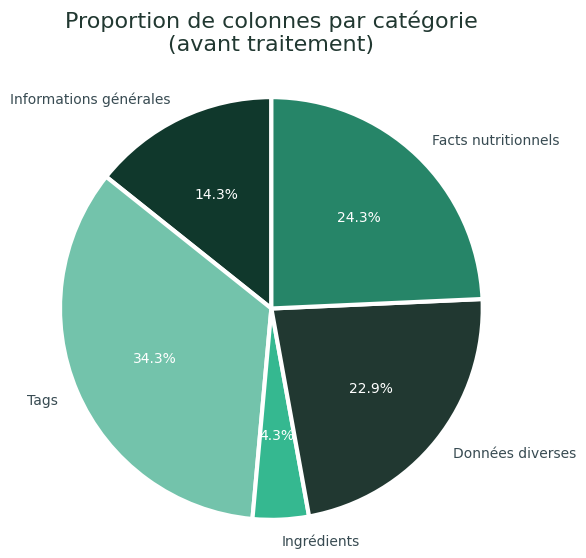

In [66]:
# Count the number of columns per category
num_general_information = len(col_general_information)
num_tags = len(col_tags)
num_ingredients = len(col_ingredients)
num_miscellaneous_data = len(col_miscellaneous_data)
num_nutrition_facts = len(col_nutrition_facts)
# Category names for display
categories = ["Informations générales", "Tags", "Ingrédients", "Données diverses", "Facts nutritionnels"]
# Number of columns in each category
num_columns_per_category = [num_general_information, num_tags, num_ingredients, num_miscellaneous_data, num_nutrition_facts]

# Define color code
colors = ["#10382C", '#73C3AB', '#35B890', '#213831', '#268568']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    num_columns_per_category, labels=categories,
    startangle=90, colors=colors, autopct="%1.1f%%", wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de colonnes par catégorie\n(avant traitement)",pad=20,color="#213831",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

 Ainsi, les informations générales permettent d'exclure rapidement certaine variable telle que les variables temporelles, la quantité d'un nutriment pour une portion et les varibales qui ne sont pas identifier avec le suffixe "_fr".

#### A. Informations sur la fiche produit

In [36]:
df_food_fr.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nu

#### B. Tags

#### C. Ingrédients et additifs éventuels

#### D. Informations nutritionnelles

### pnns_groups 1 & 2 - Analyse et correction des erreurs

Lancé en 2001, le Programme national nutrition santé (PNNS) a pour objectif général l’amélioration de l’état de santé de l’ensemble de la population en agissant sur l’un de ses déterminants majeurs : la nutrition (comprenant l’alimentation, l’activité physique et la sédentarité). Ce programme a été reconduit en 2006 (PNNS-2), en 2011 (PNNS-3) et en 2019 (PNNS-4).

In [59]:
df_food_fr.columns[~df_food_fr.columns.str.contains("_100g")]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr'],
      dtype='object')

In [ ]:
# Check the uniqus values 
df_food_fr["pnns_groups_1"].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [ ]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("unknown",np.nan)

In [ ]:
df_food_fr[df_food_fr["pnns_groups_1"] == "cereals-and-potatoes"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,haricots beurre,NaN,NaN,0.0,NaN,cereals-and-potatoes,legumes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218773,3270160046201,Maïs doux en épis,maïs,NaN,NaN,0.0,a,cereals-and-potatoes,cereals,334.0,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [ ]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("cereals-and-potatoes","Cereals and potatoes")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_1"] == "fruits-and-vegetables"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
54668,0042272006304,Velouté de champignons,"Eau, champignons 30%, légumes 12% (oignons, po...","crème, beurre, céleri",NaN,0.0,c,fruits-and-vegetables,vegetables,197.0,...,0.5,0.5,1.0,0.7620,0.300000,NaN,NaN,NaN,NaN,4.0
66705,00595837,Champignons de Paris émincés épais,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,79.0,...,0.0,2.1,2.2,0.7000,0.275591,NaN,NaN,NaN,NaN,0.0
175463,2000000005976,Mélange Persil/Ail coupé surgelé prêt à l'empl...,Persil et ail en proportion variable.,NaN,NaN,0.0,a,fruits-and-vegetables,vegetables,304.0,...,9.3,3.2,4.4,0.0508,0.020000,NaN,NaN,NaN,NaN,-9.0
175886,2000000021526,Champignons de Paris Pieds & Morceaux,"Champignons de Paris, eau, sel, acidifiant : a...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,52.0,...,0.5,NaN,1.9,0.5500,0.216535,NaN,NaN,NaN,NaN,1.0
176961,20004088,"Champignons I. Wahl, ganze Köpfe","Champignons, Wasser, Speisesalz, Säuerungsmitt...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,fruits-and-vegetables,vegetables,82.0,...,0.1,NaN,2.3,0.7000,0.275591,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313349,8710438089998,Mini Smile' Up,"Pommes de terre, pommes de terre déshydratées,...",NaN,E464 - Hydroxypropylméthylcellulose,0.0,a,fruits-and-vegetables,vegetables,932.0,...,0.5,3.9,3.3,0.5000,0.196850,NaN,NaN,NaN,NaN,-8.0
313357,8710438097979,Potatoes à Rôtir - Ail et persil,"Pommes de terre (90,5%), enrobage (5%) : farin...","blé, blé",NaN,0.0,a,fruits-and-vegetables,vegetables,573.0,...,0.5,3.0,2.5,0.5000,0.196850,NaN,NaN,NaN,NaN,-7.0
313542,8710609310326,Champignons de Paris,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,NaN,fruits-and-vegetables,vegetables,76.0,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314818,8713021211110,Champignons Blancs de Paris,NaN,NaN,NaN,NaN,NaN,fruits-and-vegetables,vegetables,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("fruits-and-vegetables","Fruits and vegetables")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_1"] == "sugary-snacks"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
66153,00561112,Iced & Spiced Soft Bun,Farine de blé (contient _Gluten_) (avec Farine...,"Gluten, Gluten, Gluten","E170 - Carbonate de calcium,E375 - Acide nicot...",1.0,c,sugary-snacks,pastries,1276.0,...,36.0,2.2,4.9,0.33000,0.129921,NaN,NaN,NaN,NaN,9.0
112689,0201292018371,Pain chocolat (x 5),"Farine de blé, beurre 22%, lait demi-écrémé pa...",NaN,E322 - Lécithines,0.0,NaN,sugary-snacks,pastries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112764,0202446006565,Chouquette x10,"_Oeufs_ entiers, eau, farine de _blé_, _beurre...","Oeufs, blé, beurre","E160a - Bêta-carotène,E450i - Pyrophosphate de...",0.0,NaN,sugary-snacks,pastries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112772,0202577010172,Croissants,"Croissant 96 % (farine de _blé_*, _beurre_* 22...","blé, beurre, oeufs, blé, oeufs",E300 - Acide ascorbique,0.0,d,sugary-snacks,pastries,1835.0,...,7.2,2.2,7.5,1.08000,0.425197,NaN,NaN,NaN,NaN,17.0
112773,0202581010823,Pains au chocolat,NaN,NaN,NaN,NaN,d,sugary-snacks,pastries,1815.0,...,11.0,2.8,8.4,0.90000,0.354331,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311667,8480017081896,Pains au chocolat (x 10) 450 g - Dia,"farine de _blé_, huiles végétales (palme, colz...","blé, soja, beurre, gluten, blé, lait","E322 - Lécithines,E471 - Mono- et diglycérides...",1.0,e,sugary-snacks,pastries,1726.0,...,19.2,NaN,6.3,1.25984,0.496000,NaN,NaN,NaN,NaN,24.0
311668,8480017081902,Croissants (x 10) 400 g - Dia,"Farine de blé, huiles végétales (palme, colza)...",NaN,E471 - Mono- et diglycérides d'acides gras ali...,1.0,e,sugary-snacks,pastries,1709.0,...,7.3,NaN,6.2,1.30048,0.512000,NaN,NaN,NaN,NaN,21.0
311916,8480017311498,Brioche tranchée pur beurre,"Farine de _blé_, sucre, _oeufs_ entiers liquid...","blé, oeufs, beurre, beurre, gluten, blé",E471 - Mono- et diglycérides d'acides gras ali...,0.0,d,sugary-snacks,pastries,1457.0,...,14.0,NaN,7.6,0.84000,0.330709,NaN,NaN,NaN,NaN,16.0
318568,91260369,Gâche,"Farine de blé, œufs frais, sucre, beurre* 12,7...",NaN,NaN,0.0,e,sugary-snacks,pastries,1634.0,...,16.2,NaN,8.9,0.91000,0.358268,NaN,NaN,NaN,NaN,20.0


In [ ]:
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].replace("sugary-snacks","Sugary snacks")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_1"].isnull()]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,"Milk chocolate coating (evaporated cane juice,...",NaN,E322 - Lécithines,0.0,e,NaN,unknown,1883.0,...,57.50,2.5,2.50,0.09652,0.03800,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1481.0,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320757,9900000000233,Amandes,NaN,NaN,NaN,NaN,b,NaN,NaN,2406.0,...,3.89,12.2,21.22,0.10000,0.03937,NaN,NaN,NaN,NaN,0.0
320760,99044169,Poireaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,Roussette du Bugey (2011),NaN,NaN,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the unique values
df_food_fr["pnns_groups_2"].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products', 'Cheese',
       'Sweets', 'Sandwich', 'Appetizers', 'Dressings and sauces',
       'Dried fruits', 'Nuts', 'Breakfast cereals',
       'Pizza pies and quiche', 'Fruits', 'Fruit juices', 'Fats',
       'Alcoholic beverages', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products', 'fruits', 'legumes',
       'cereals'], dtype=object)

In [ ]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("fruits", "Fruits")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_2"] == "legumes"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218764,3270160019151,Haricots beurre,haricots beurre,NaN,NaN,0.0,NaN,Cereals and potatoes,legumes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("legumes", "Legumes")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_2"] == "vegetables"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
54668,0042272006304,Velouté de champignons,"Eau, champignons 30%, légumes 12% (oignons, po...","crème, beurre, céleri",NaN,0.0,c,Fruits and vegetables,vegetables,197.0,...,0.5,0.5,1.0,0.7620,0.300000,NaN,NaN,NaN,NaN,4.0
66705,00595837,Champignons de Paris émincés épais,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,79.0,...,0.0,2.1,2.2,0.7000,0.275591,NaN,NaN,NaN,NaN,0.0
175463,2000000005976,Mélange Persil/Ail coupé surgelé prêt à l'empl...,Persil et ail en proportion variable.,NaN,NaN,0.0,a,Fruits and vegetables,vegetables,304.0,...,9.3,3.2,4.4,0.0508,0.020000,NaN,NaN,NaN,NaN,-9.0
175886,2000000021526,Champignons de Paris Pieds & Morceaux,"Champignons de Paris, eau, sel, acidifiant : a...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,52.0,...,0.5,NaN,1.9,0.5500,0.216535,NaN,NaN,NaN,NaN,1.0
176961,20004088,"Champignons I. Wahl, ganze Köpfe","Champignons, Wasser, Speisesalz, Säuerungsmitt...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,b,Fruits and vegetables,vegetables,82.0,...,0.1,NaN,2.3,0.7000,0.275591,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313349,8710438089998,Mini Smile' Up,"Pommes de terre, pommes de terre déshydratées,...",NaN,E464 - Hydroxypropylméthylcellulose,0.0,a,Fruits and vegetables,vegetables,932.0,...,0.5,3.9,3.3,0.5000,0.196850,NaN,NaN,NaN,NaN,-8.0
313357,8710438097979,Potatoes à Rôtir - Ail et persil,"Pommes de terre (90,5%), enrobage (5%) : farin...","blé, blé",NaN,0.0,a,Fruits and vegetables,vegetables,573.0,...,0.5,3.0,2.5,0.5000,0.196850,NaN,NaN,NaN,NaN,-7.0
313542,8710609310326,Champignons de Paris,"Champignons, eau, sel, acidifiant : acide citr...",NaN,"E330 - Acide citrique,E300 - Acide ascorbique",0.0,NaN,Fruits and vegetables,vegetables,76.0,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314818,8713021211110,Champignons Blancs de Paris,NaN,NaN,NaN,NaN,NaN,Fruits and vegetables,vegetables,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("vegetables", "Vegetables")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_2"] == "cereals"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
218773,3270160046201,Maïs doux en épis,maïs,NaN,NaN,0.0,a,Cereals and potatoes,cereals,334.0,...,7.5,2.5,2.6,0.0,0.0,NaN,NaN,NaN,NaN,-3.0


In [ ]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("cereals", "Cereals")

In [ ]:
df_food_fr[df_food_fr["pnns_groups_2"] == "unknown"]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
46,0000000024600,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,"Milk chocolate coating (evaporated cane juice,...",NaN,E322 - Lécithines,0.0,e,NaN,unknown,1883.0,...,57.5,2.5,2.50,0.09652,0.038000,NaN,NaN,0.1,0.00090,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1481.0,...,NaN,6.2,6.25,NaN,NaN,NaN,NaN,NaN,0.00075,NaN
189,0000010127735,Sirops pour ganache macarons,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"E330 - Acide citrique,E171 - Oxyde de titane,E...",0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320670,9588400178181,Cacao,NaN,NaN,NaN,NaN,c,NaN,unknown,1568.0,...,68.0,6.4,5.70,0.06000,0.023622,NaN,NaN,NaN,NaN,10.0
320685,96083291,Malt vinegar,"Barley malt vinegar, barley malt extract",NaN,NaN,0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320696,96095065,OBF,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320736,9780201379129,Attiéké,semoule de manioc,NaN,NaN,0.0,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].replace("unknown",np.nan)

## Analyse, nettoyage et préparation du dataset

In [35]:
df_food_fr = df_food_fr.dropna(subset="product_name")

In [34]:
df_food_fr[df_food_fr["product_name"].isnull()]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
48,0000000027205,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,NaN,Root-bier,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,"46,7 g","Snacks sucrés,Confiseries,Bonbons",France,NaN,NaN,Œufs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,00003001,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320718,9688084817410,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,9800801107,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320746,9800895007,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,9800895250,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selection des colonnes utiles pour la suite de l'analyse

In [36]:
df_food_fr.columns

Index(['code', 'product_name', 'quantity', 'categories_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [37]:
df_food_fr[df_food_fr["quantity"].notnull()]["quantity"].unique()

array(['1kg', '2.46 kg', '1 kg ', ..., '1,25kg', '18,66kg', '67g'],
      dtype=object)

In [38]:
df_food_fr[df_food_fr["countries_fr"].notnull()]["countries_fr"]

0                    France
46                   France
106       France,États-Unis
136                  France
138       France,États-Unis
                ...        
320761               France
320763               France
320764               France
320765               France
320770               France
Name: countries_fr, Length: 91651, dtype: object

In [39]:
df_food_fr[df_food_fr["main_category_fr"].notnull()]["main_category_fr"].unique()

array(['Filet-de-boeuf', 'Aliments et boissons à base de végétaux',
       'Sablés', ..., 'en:Cremes-vegetales-a-base-de-coco-pour-cuisiner',
       'en:Malt-vinegar', 'Attieke'], dtype=object)

In [40]:
df_food_fr[df_food_fr["categories_fr"].notnull()]["categories_fr"].unique()

array(['Filet-de-boeuf',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Légumineuses et dérivés,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles,Lentilles vertes",
       'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés', ...,
       'Attieke,Manioc,Semoules-de-manioc',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains,Biscottes,Biscottes-au-sarrasin",
       'Boissons,Boissons alcoolisées,Vins,Vins français,Vins blancs,Bugey'],
      dtype=object)

In [41]:
df_food_fr[df_food_fr["traces_fr"].notnull()]["traces_fr"].unique()

array(['Fruits à coque,Graines de sésame,Soja',
       'Œufs,Gluten,Lait,Moutarde,Fruits à coque,Graines de sésame,Soja,Anhydride sulfureux et sulfites',
       'Fruits à coque,Soja', ...,
       'Fabrique-sur-des-equipements-utilises-pour-le-traitement-de-produits-contenant-des-cacahuetes-et-diverses-varietes-de-noix',
       'Arachides,en:Tree-nut', 'Poisson,Gluten,Mollusques,Soja'],
      dtype=object)

In [42]:
columns_to_deleted = ["quantity","countries_fr","main_category_fr","categories_fr","traces_fr"]

In [43]:
df_food_fr = df_food_fr.drop(columns=columns_to_deleted)

## Outliers

### Analyse

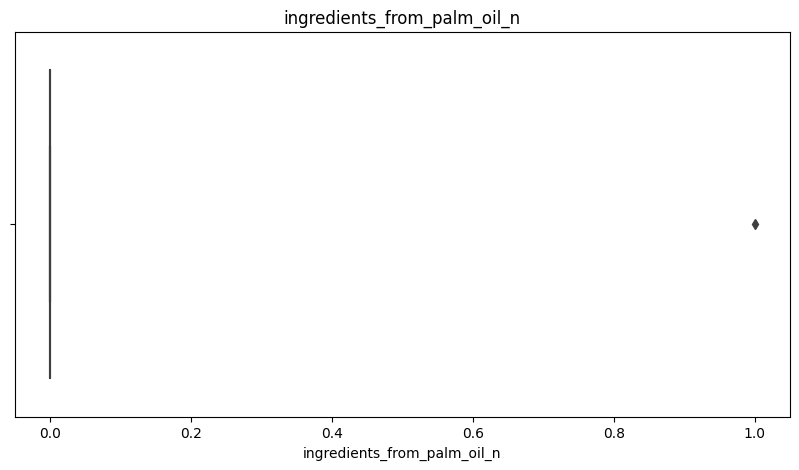

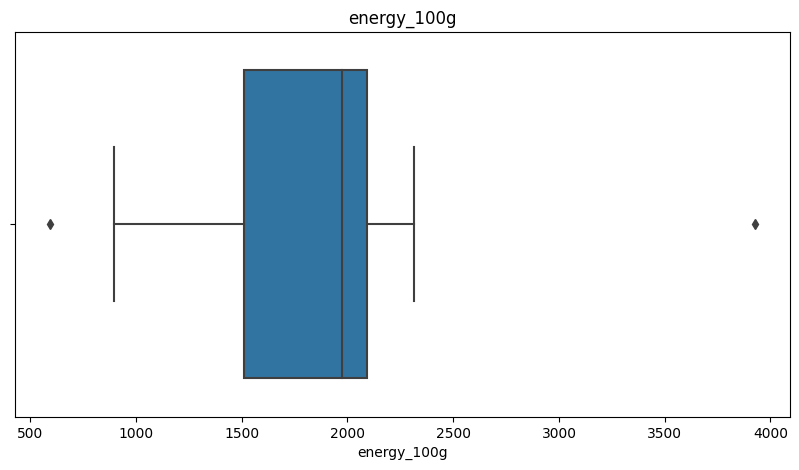

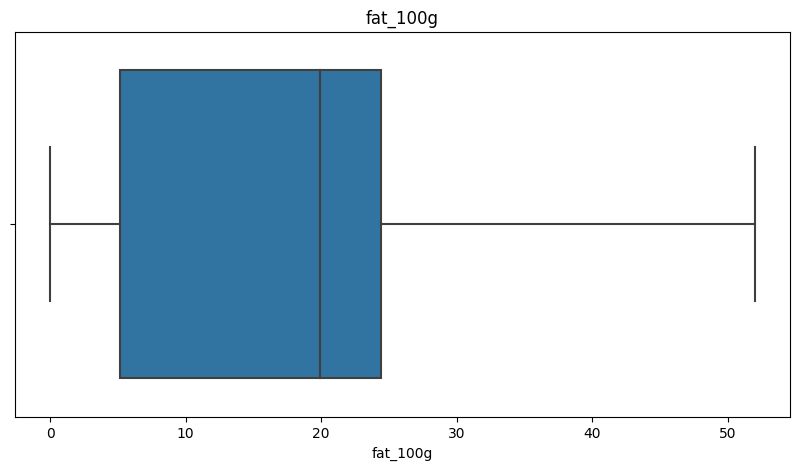

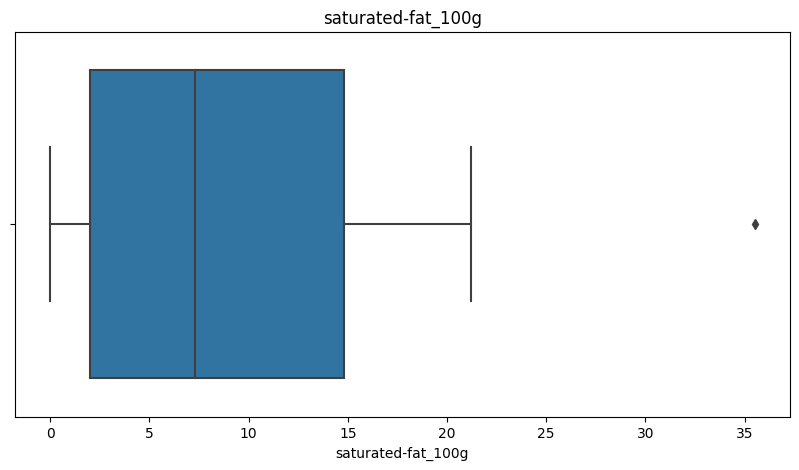

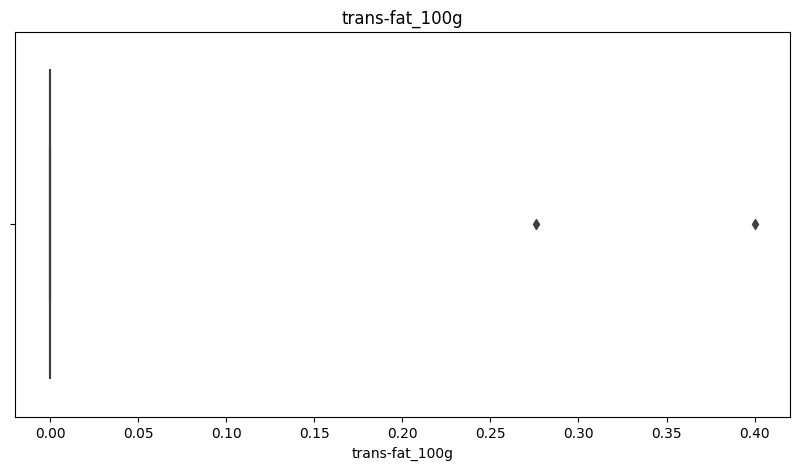

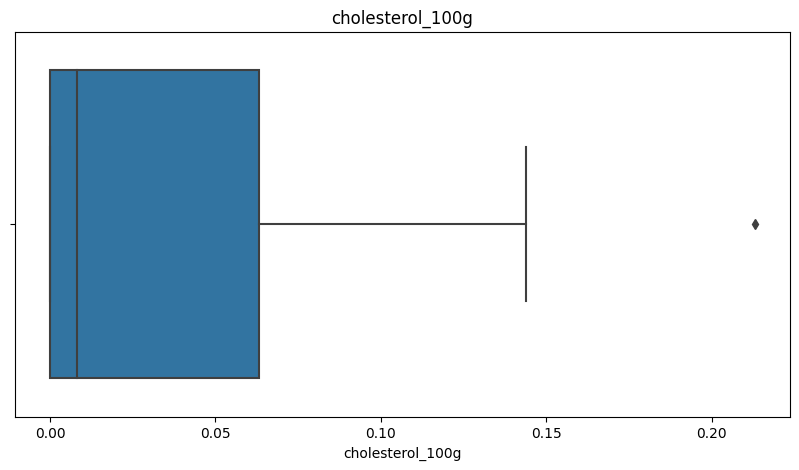

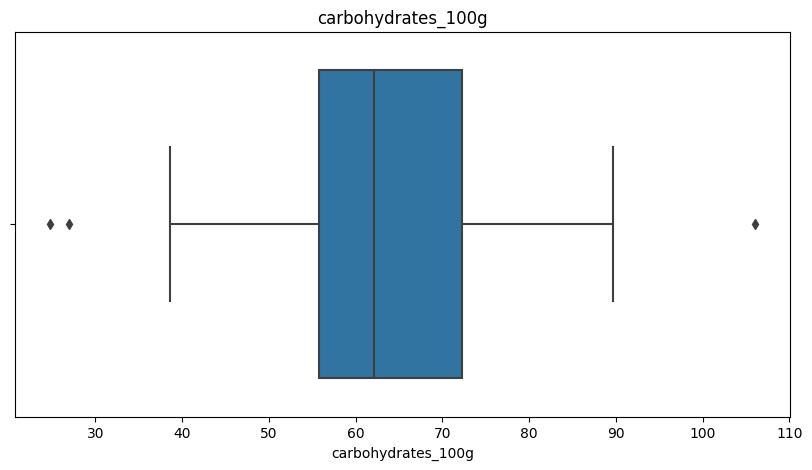

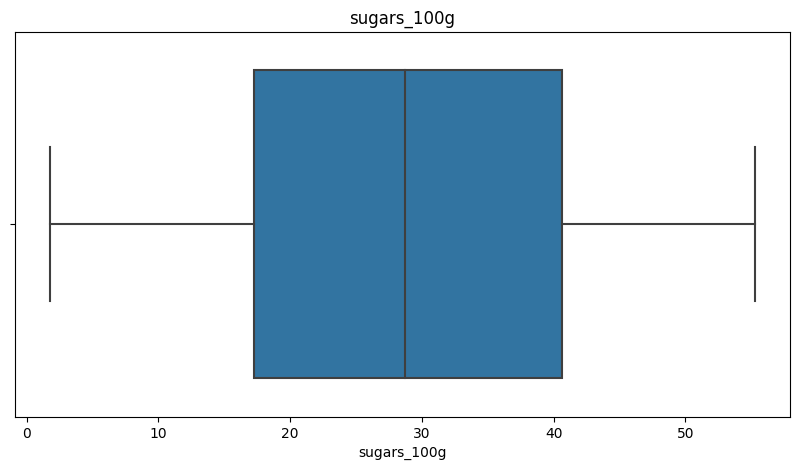

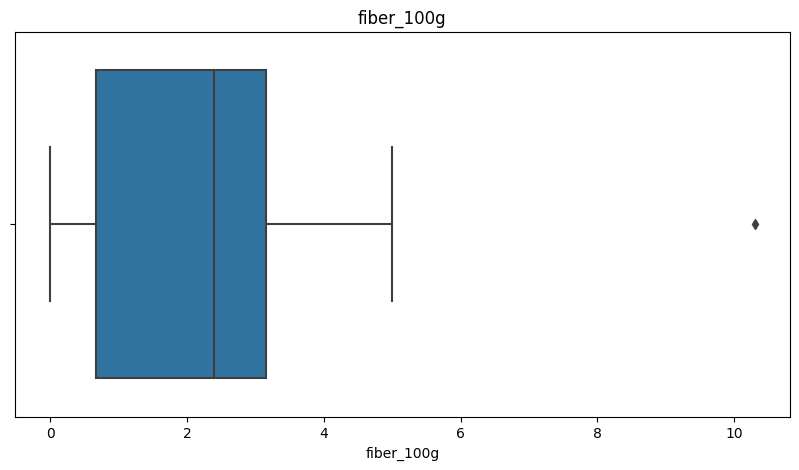

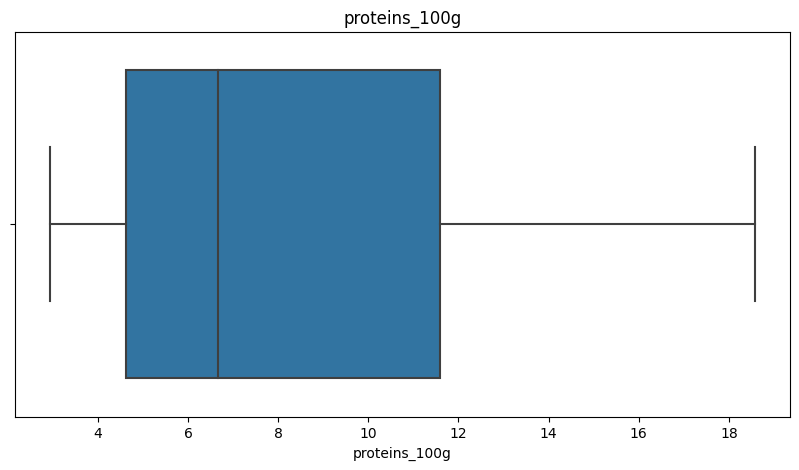

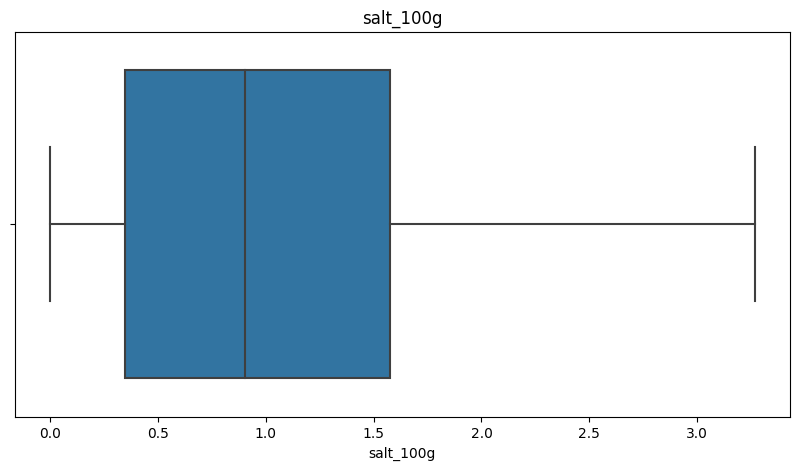

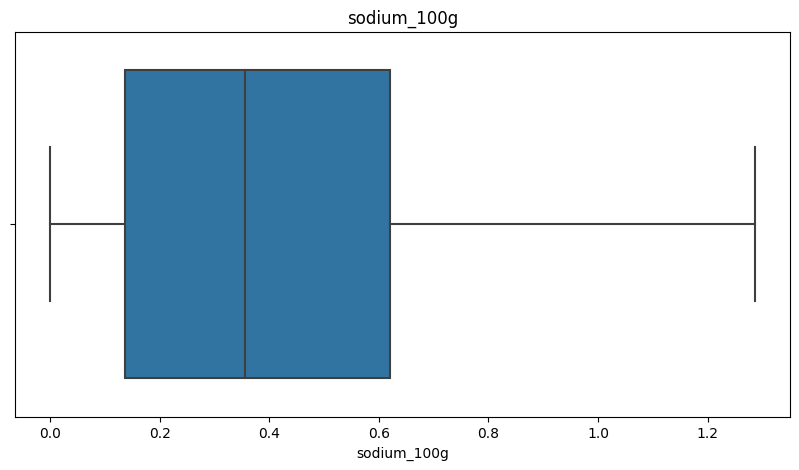

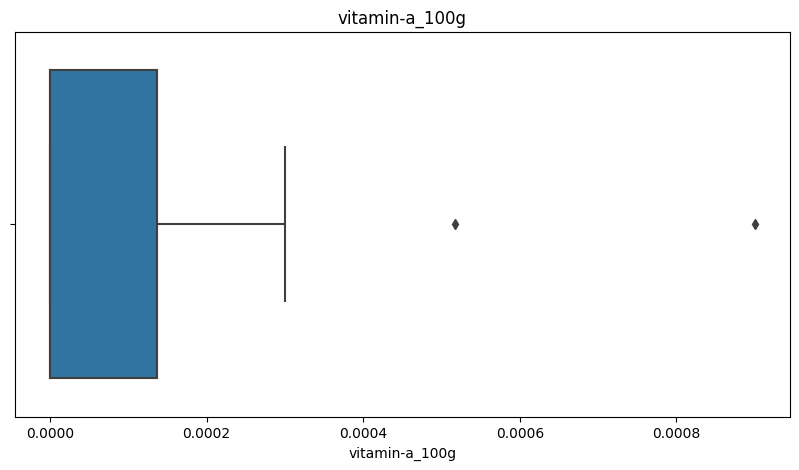

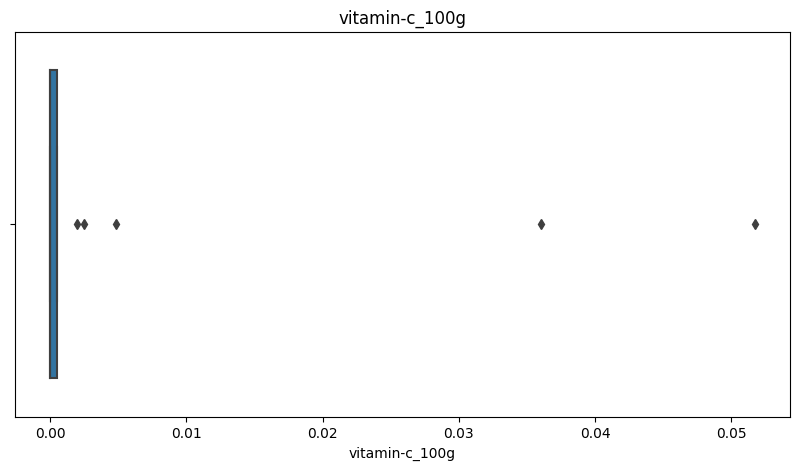

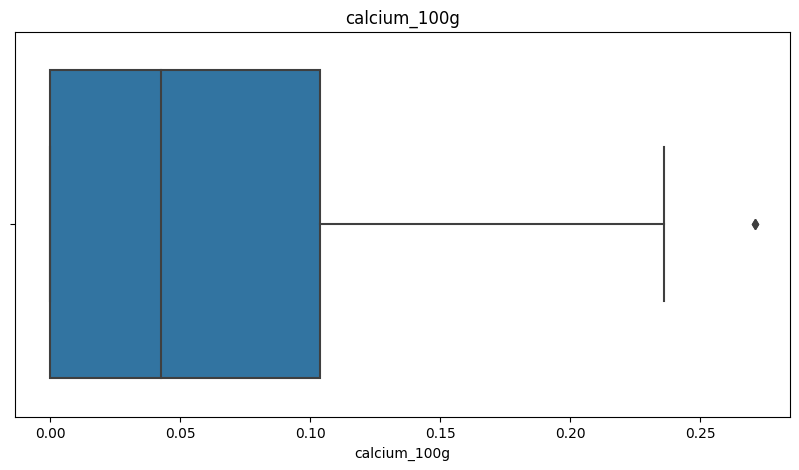

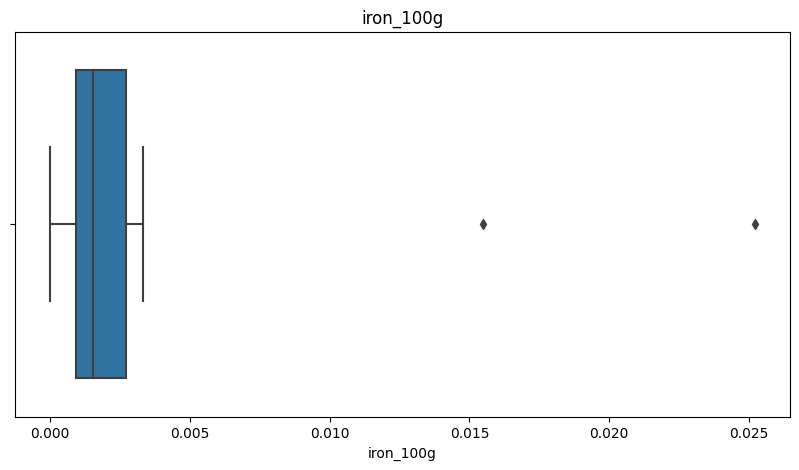

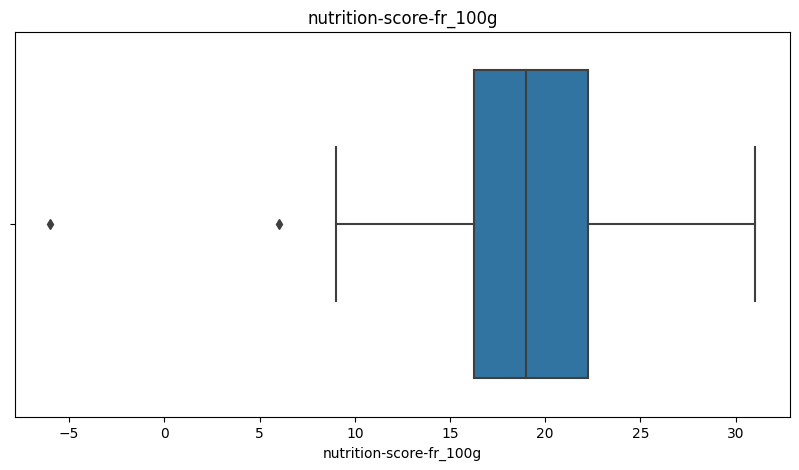

In [ ]:
for col in df_food_fr.columns:
    if df_food_fr[col].dtype == "float":
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_food_fr.dropna(), x=col, y=None)
        plt.title(col)
        plt.show()
    else:
        continue

In [ ]:
"""sns.pairplot(df_food_fr)"""

'sns.pairplot(df_food_fr)'

### Normalisation théorique

#### Colonnes 100g

In [ ]:
nutrition_columns = df_food_fr.columns[df_food_fr.columns.str.contains("_100g") & ~df_food_fr.columns.str.contains("energy_100g")]

In [ ]:
for col in nutrition_columns:
    df_food_fr.loc[df_food_fr[col] > 100, col] = np.nan

#### Autres colonnes

In [ ]:
df_food_fr["ingredients_from_palm_oil_n"].unique()

array([nan,  0.,  1.,  2.])

In [ ]:
# Remplacer les valeurs par un booléen
df_food_fr.loc[df_food_fr["ingredients_from_palm_oil_n"] > 0, "ingredients_from_palm_oil_n"] = True
df_food_fr.loc[(df_food_fr["ingredients_from_palm_oil_n"] == 0) | (df_food_fr["ingredients_from_palm_oil_n"].isnull()), "ingredients_from_palm_oil_n"] = False

In [ ]:
# Remplacement des valeurs supérieur à 3800 KJ (max contenu dans 100g de lipides)
for i in df_food_fr["energy_100g"]:
    if i > 3800:
        df_food_fr["energy_100g"] = df_food_fr["energy_100g"].replace(i,np.nan)

In [ ]:
# Mise en majuscule des valeurs
df_food_fr["nutrition_grade_fr"] = df_food_fr["nutrition_grade_fr"].str.upper()

In [ ]:
df_food_fr.loc[df_food_fr["additives_fr"].notnull(), "additives_fr"] = True
df_food_fr.loc[df_food_fr["additives_fr"].isnull(), "additives_fr"] = False

### **Outliers - saturated-fat_100g et fat_100g**

Relation entre les graisses saturées et les graisses :
Les graisses saturées font partie du groupe plus large des graisses. En conséquence, lorsque l'on parle de la relation entre les graisses saturées et les graisses, on se réfère généralement à la proportion de graisses saturées dans l'apport total en graisses.

<Axes: xlabel='fat_100g', ylabel='saturated-fat_100g'>

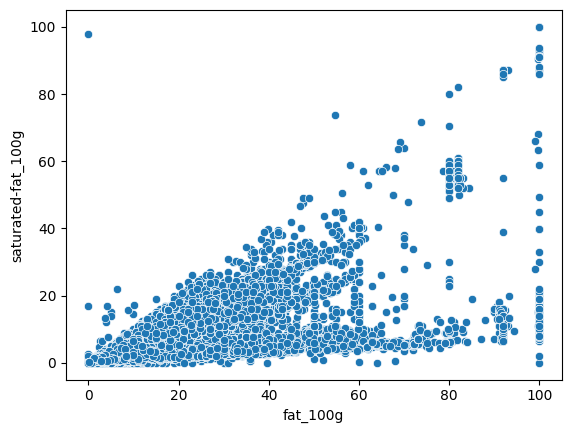

In [ ]:
sns.scatterplot(data=df_food_fr, y="saturated-fat_100g", x="fat_100g")

In [ ]:
df_food_fr.loc[df_food_fr["saturated-fat_100g"] > df_food_fr["fat_100g"],["saturated-fat_100g", "fat_100g"]] = np.nan

<Axes: xlabel='fat_100g', ylabel='saturated-fat_100g'>

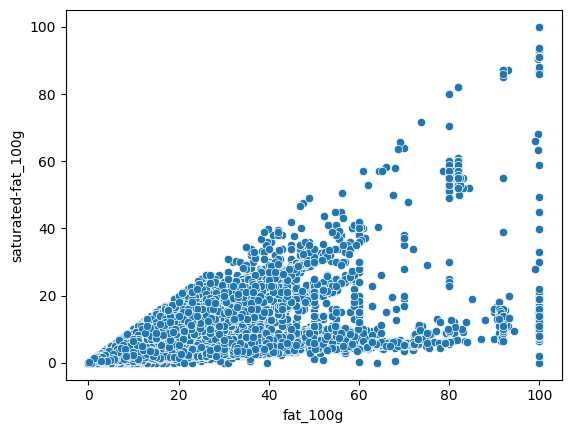

In [ ]:
sns.scatterplot(data=df_food_fr, y="saturated-fat_100g", x="fat_100g")

### **Outliers - salt_100g et sodium_100g**

Le sodium est le composant du sel qui est lié aux problèmes de santé (consommation excessive de sel)
Lorsque vous regardez la teneur en sodium dans les aliments, il est important de prendre en compte la quantité totale de sel consommée, car environ **40 % du poids du sel est constitué de sodium**. *Par exemple, si un aliment 1 000 mg de sodium, cela équivaut à environ 2 500 mg de sel (1 000 mg de sodium / 0,4).*

<Axes: xlabel='sodium_100g', ylabel='salt_100g'>

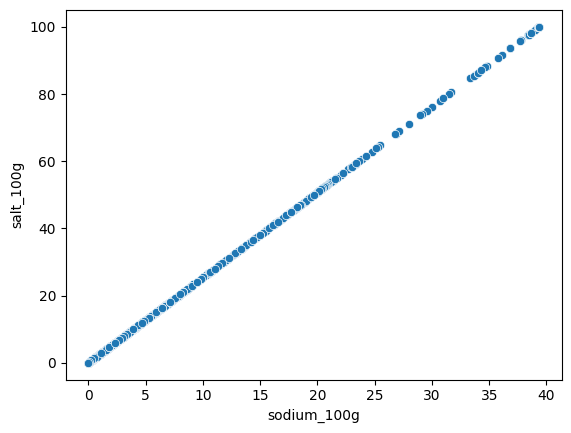

In [ ]:
sns.scatterplot(data=df_food_fr,y='salt_100g',x="sodium_100g")

In [ ]:
# Suppression de la colonne sodium
df_food_fr = df_food_fr.drop(columns="sodium_100g", axis=1)

### **Outliers - carbohydrates_100g et sugars_100g**

Dans la littérature scientifique, il existe une relation étroite entre les hydrates de carbone et le sucre. En fait, les hydrates de carbone, également appelés glucides, sont un groupe de macronutriments qui comprennent les sucres simples (monosaccharides), les sucres doubles (disaccharides) et les sucres complexes (polysaccharides). Le sucre, dans le contexte courant, fait référence principalement aux sucres simples tels que le glucose, le fructose et le saccharose.

Il est important de noter que les hydrates de carbone sont une source essentielle d'énergie pour notre corps, et les sucres simples sont rapidement disponibles pour être utilisés comme carburant. Cependant, une consommation excessive de sucres simples peut être problématique pour la santé, car elle peut contribuer à des problèmes tels que l'obésité, le diabète de type 2 et les maladies cardiovasculaires.

<Axes: xlabel='carbohydrates_100g', ylabel='sugars_100g'>

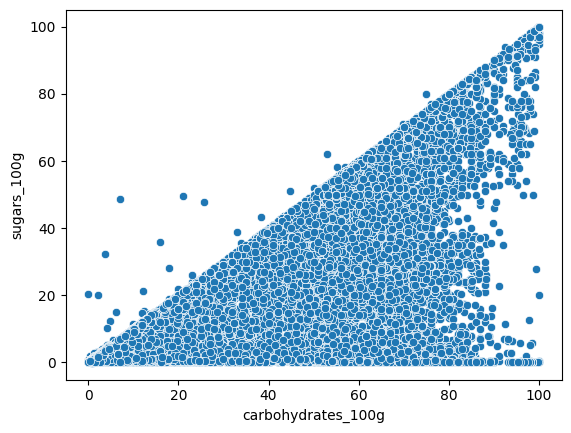

In [ ]:
sns.scatterplot(data=df_food_fr,x="carbohydrates_100g",y="sugars_100g")

In [ ]:
df_food_fr.loc[df_food_fr["sugars_100g"] > df_food_fr["carbohydrates_100g"],["sugars_100g", "carbohydrates_100g"]] = np.nan

<Axes: xlabel='carbohydrates_100g', ylabel='sugars_100g'>

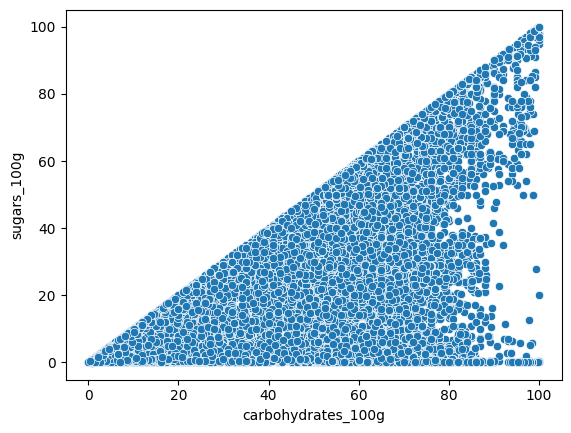

In [ ]:
sns.scatterplot(data=df_food_fr, x="carbohydrates_100g", y="sugars_100g")

### Outliers - fat_100g

<Axes: ylabel='fat_100g'>

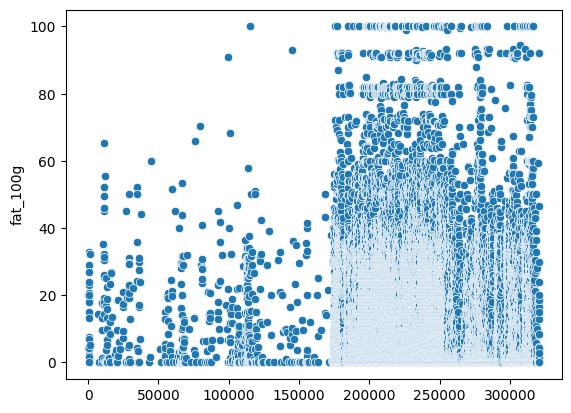

In [ ]:
sns.scatterplot(df_food_fr["fat_100g"])

### Outliers - cholesterol_100g

<Axes: ylabel='cholesterol_100g'>

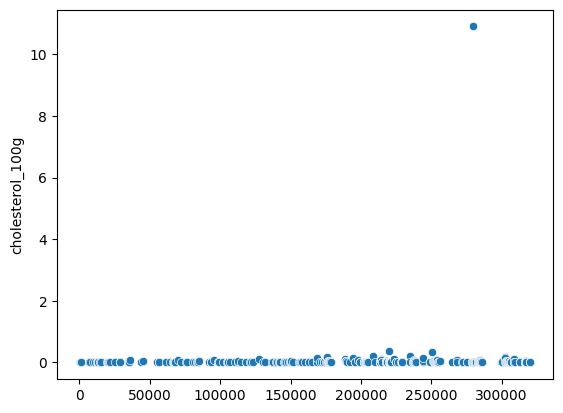

In [ ]:
sns.scatterplot(df_food_fr["cholesterol_100g"])

In [ ]:
df_food_fr[df_food_fr["cholesterol_100g"] > 2][["code","product_name","cholesterol_100g"]]

,code,product_name,cholesterol_100g
279394,5412038381481,Praliné Lait,10.9


In [ ]:
df_food_fr["cholesterol_100g"].mean(),df_food_fr["cholesterol_100g"].std()

(0.04191263591022445, 0.5450248822593856)

In [ ]:
# z-score
(10.9-0.046)/0.135

80.4

### Outliers - sugars_100g

<Axes: ylabel='sugars_100g'>

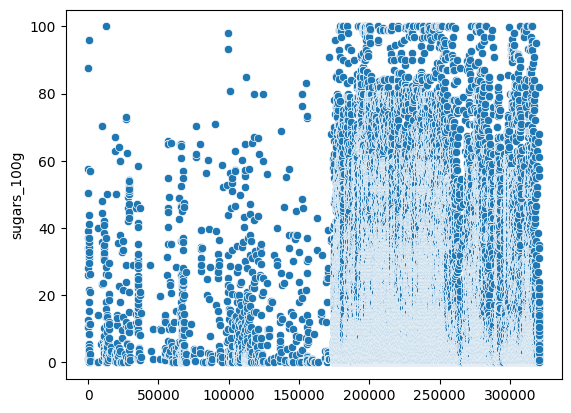

In [ ]:
sns.scatterplot(df_food_fr["sugars_100g"])

### Outliers - fiber_100g

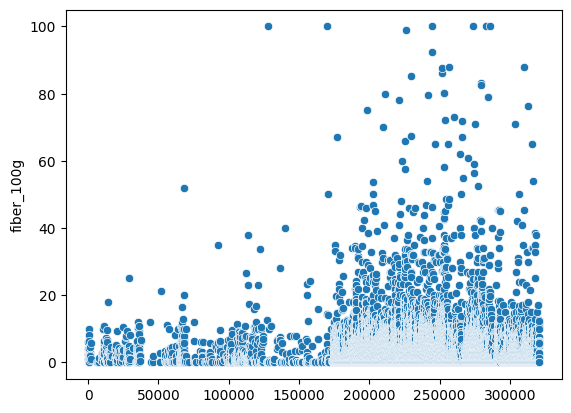

In [ ]:
sns.scatterplot(df_food_fr["fiber_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

### Outliers - proteins_100g

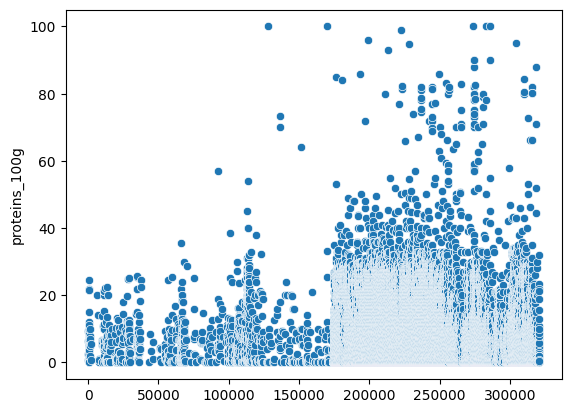

In [ ]:
sns.scatterplot(df_food_fr["proteins_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

### Outliers - salt_100g

<Axes: ylabel='salt_100g'>

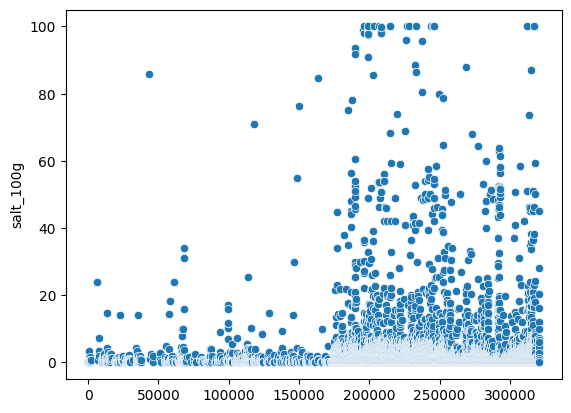

In [ ]:
sns.scatterplot(df_food_fr["salt_100g"])

### Outliers - vitamin-a_100g

<Axes: ylabel='vitamin-a_100g'>

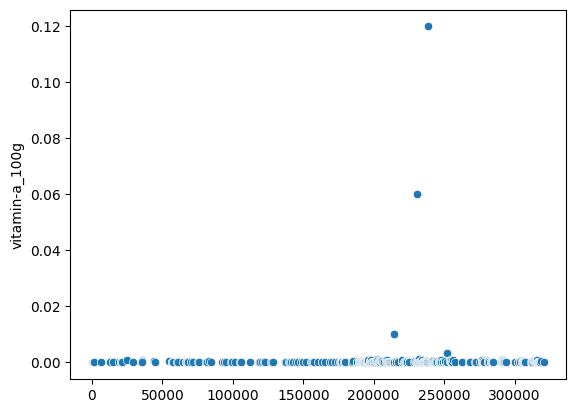

In [ ]:
sns.scatterplot(df_food_fr["vitamin-a_100g"])

In [ ]:
df_food_fr[df_food_fr["vitamin-a_100g"] > 0.01][["code","product_name","vitamin-a_100g"]]

,code,product_name,vitamin-a_100g
231048,3401528535864,Centrum Men,0.0602
238159,3560070362486,"Multifruits, boisson",0.1200


### Outliers - vitamin-c_100g

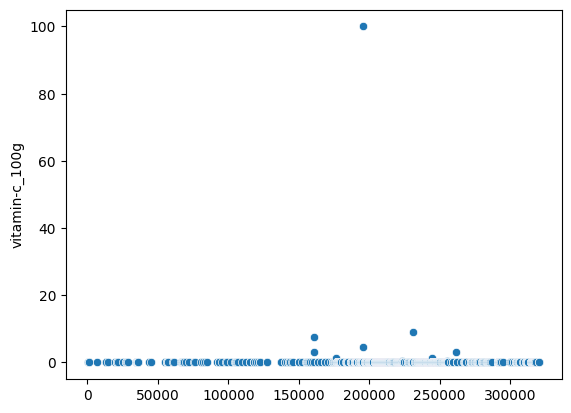

In [ ]:
sns.scatterplot(df_food_fr["vitamin-c_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
df_food_fr[df_food_fr["vitamin-c_100g"] > 80][["product_name","vitamin-c_100g"]]

,product_name,vitamin-c_100g
195747,Juvamine Vitamine C500 à croquer sans sucres,100.0


In [ ]:
df_food_fr[df_food_fr["vitamin-c_100g"] > 80]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
195747,3160921610300,Juvamine Vitamine C500 à croquer sans sucres,"Agent de charge : Sorbitol, Vitamine C, Anti-a...",NaN,True,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


In [ ]:
df_food_fr[df_food_fr["vitamin-c_100g"] < 80][["product_name","vitamin-c_100g"]].sort_values("vitamin-c_100g",ascending=False).head(15)

,product_name,vitamin-c_100g
231048,Centrum Men,9.020
161015,"Coconut Liquid Water Enhancer, Original",7.500
195726,Junior Vitamine C & Calcium goût Fraise à croquer,4.710
261524,CitroBiotic,3.000
161016,Liquid Water Enhancer,3.000
244421,Topslim 3 en 1 Goût framboise,1.250
176689,Préparation pour boisson isotonique aromatisée...,1.200
255194,Strawberry,0.582
223259,Nectar Cerise Acerola,0.300
262354,Waldbeeren,0.250


### Outliers - calcium_100g

<Axes: ylabel='calcium_100g'>

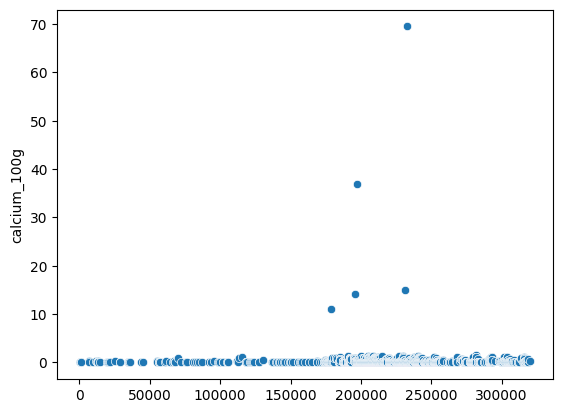

In [ ]:
sns.scatterplot(df_food_fr["calcium_100g"])

In [ ]:
df_food_fr[df_food_fr["calcium_100g"] > 8][["code","product_name","calcium_100g"]]

,code,product_name,calcium_100g
179094,20289126,Calcium + Vitamine D3,11.1
195726,3160920651304,Junior Vitamine C & Calcium goût Fraise à croquer,14.1
197178,3175680018939,Gerblé biscuit muesli avoine,37.0
231048,3401528535864,Centrum Men,15.0
232483,3428274140029,Milk'nGO,69.5


In [ ]:
# MAJ des valeurs renseigné en mg alors que la colonne est en gramme
df_food_fr.loc[df_food_fr["code"] == "20289126","calcium_100g"] = 0.5
# 
df_food_fr.loc[df_food_fr["code"] == "3160920651304","calcium_100g"] = 0.12
# 
df_food_fr.loc[df_food_fr["code"] == "3175680018939","calcium_100g"] = 0.383
# 
df_food_fr.loc[df_food_fr["code"] == "3401528535864","calcium_100g"] = 0.2

### Outliers - Iron

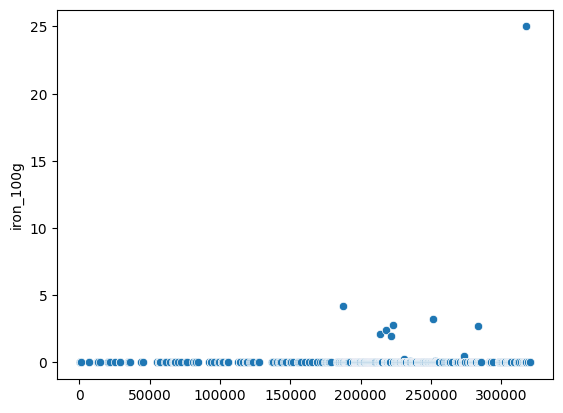

In [ ]:
sns.scatterplot(df_food_fr["iron_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
df_food_fr.loc[df_food_fr["iron_100g"] > 5]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
317615,8934572400871,Nems apéritifs aux crevettes & à l'ail,"Galette de _blé_, _crevette_, ail, sucre, sel,...","blé, crevette",True,False,D,Salty snacks,Appetizers,2046.0,...,61.7,7.89,2.45,12.6,2.2225,0.0,0.0,0.271,25.0,13.0


Tableau nutritionnel du site OpenFoodFact. Toutes les données sont conformes aux données traités ici sauf le fer qui semble avoir été mis à jour. 
https://fr.openfoodfacts.org/produit/8934572400871/nems-aperitifs-aux-crevettes-a-l-ail-croq-n-crak

In [ ]:
# MAJ des valeurs renseigné en mg alors que la colonne est en gramme
df_food_fr.loc[df_food_fr["code"] == "8934572400871","iron_100g"] = 0.00155
# 
df_food_fr.loc[df_food_fr["code"] == "3017760492096","iron_100g"] = 0.0051
# 
df_food_fr.loc[df_food_fr["code"] == "3760020503833","iron_100g"] = 0.0031
# 
df_food_fr.loc[df_food_fr["code"] == "6194012401048","iron_100g"] = 0.0027
# 
df_food_fr.loc[df_food_fr["code"] == "3401528535864","iron_100g"] = 0.00375

In [ ]:
df_food_fr.loc[df_food_fr["iron_100g"] > 1,"iron_100g"] = np.nan

In [ ]:
df_food_fr.loc[df_food_fr["iron_100g"] > 0.2]

,code,product_name,ingredients_text,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
273816,5053827138802,Disney Frozen,"Farine de céréales (riz, _avoine_ (26%), maïs)...",avoine,True,True,B,Cereals and potatoes,Breakfast cereals,1602.0,...,77.0,21.0,8.0,8.0,0.38,NaN,NaN,0.008,0.456,0.0


<Axes: ylabel='iron_100g'>

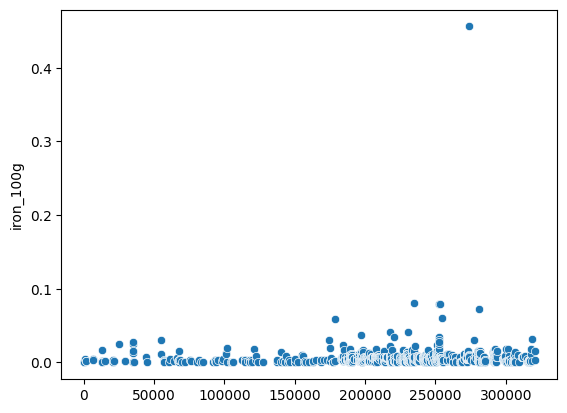

In [ ]:
sns.scatterplot(df_food_fr["iron_100g"])

### Outliers - nutrition-score-fr_100g

Le Nutri-Score a été mis au point par des équipes de recherche internationales indépendantes composées de scientifiques, de médecins et de nutritionnistes, pour rendre les informations nutritionnelles plus faciles à décrypter. Pour classer chaque produit, le Nutri-Score prend en compte, pour 100 grammes de produit, la teneur :

en nutriments et aliments à favoriser : fibres, protéines, fruits et légumes, légumes sec…
en nutriments à limiter : calories, acides gras saturés, sucres, sel
Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur :

du produit  le plus favorable sur le plan nutritionnel (classé A)
au produit le moins favorable sur le plan nutritionnel (classé E)
Pour tenir compte des spécificités de certaines familles d’aliments telles que les matières grasses ajoutées (beurre, huile), les fromages ou encore les boissons, la méthode de calcul du score a été adaptée. 

In [ ]:
df_food_fr.columns

Index(['code', 'product_name', 'ingredients_text', 'allergens', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [ ]:
pd.DataFrame(df_food_fr.isna().mean())

,0
code,0.000000
product_name,0.000000
ingredients_text,0.415620
allergens,0.750346
additives_fr,0.000000
ingredients_from_palm_oil_n,0.000000
nutrition_grade_fr,0.332751
pnns_groups_1,0.429564
pnns_groups_2,0.406826
energy_100g,0.299037


<Axes: >

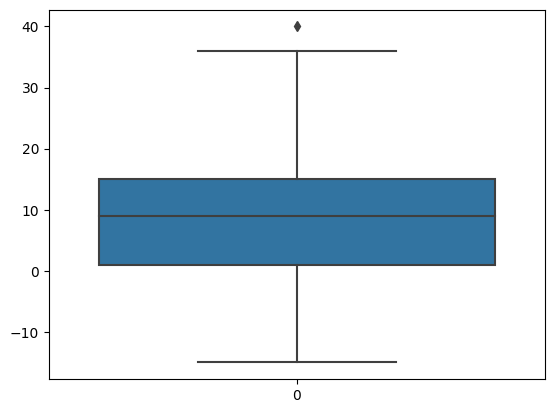

In [ ]:
sns.boxplot(df_food_fr["nutrition-score-fr_100g"])

In [ ]:
df_food_fr.loc[df_food_fr["nutrition-score-fr_100g"] > 35][["code","product_name","nutrition-score-fr_100g"]]

,code,product_name,nutrition-score-fr_100g
115094,03423909,Barre Chocolatée Au Lait Hershey's,36.0
177065,20009373,Cappuccino allégé en sucre*,40.0
185367,26075631,Palmiers,36.0
189564,3033710003020,Chocolat Noir Pâtissier Dessert Nestlé,36.0
252619,3760077187673,Bouchees Coco Choc Noir,36.0
277375,54037120,Lapin Petillant,36.0
286025,7610008002390,Chocolat Noir Suisse Fourré Kirsch Liquide,36.0
318009,9002859040313,"Mais Balls, Käse",36.0
320451,9421025231179,Capricare Lait De Chèvre 2 De 6 Mois à 1 an 400 G,36.0


## Infos pnns_groups

In [ ]:
round(df_food_fr["pnns_groups_1"].value_counts()*100/len(df_food_fr),2)

pnns_groups_1
Sugary snacks              10.74
Fish Meat Eggs              7.37
Beverages                   7.18
Milk and dairy products     7.02
Cereals and potatoes        6.67
Composite foods             6.58
Fruits and vegetables       5.04
Fat and sauces              4.12
Salty snacks                2.31
Name: count, dtype: float64

In [ ]:
df_food_fr["pnns_groups_1"].value_counts()

pnns_groups_1
Sugary snacks              9846
Fish Meat Eggs             6758
Beverages                  6583
Milk and dairy products    6433
Cereals and potatoes       6117
Composite foods            6030
Fruits and vegetables      4622
Fat and sauces             3777
Salty snacks               2115
Name: count, dtype: int64

In [ ]:
df_food_fr["pnns_groups_1"].isnull().sum()

39370

In [ ]:
round(df_food_fr["pnns_groups_2"].value_counts()*100/len(df_food_fr),2)

pnns_groups_2
One-dish meals                      5.39
Biscuits and cakes                  4.10
Sweets                              3.73
Cereals                             3.32
Cheese                              3.30
Processed meat                      3.16
Non-sugared beverages               3.13
Dressings and sauces                2.83
Vegetables                          2.50
Chocolate products                  2.40
Fish and seafood                    2.39
Milk and yogurt                     2.26
Alcoholic beverages                 2.20
Sweetened beverages                 1.82
Appetizers                          1.77
Fruits                              1.67
Fruit juices                        1.67
Meat                                1.47
Bread                               1.44
Fats                                1.29
Breakfast cereals                   1.21
Dairy desserts                      0.81
Sandwich                            0.70
Ice cream                           0.64
Le

In [ ]:
df_food_fr["pnns_groups_2"].value_counts()

pnns_groups_2
One-dish meals                      4937
Biscuits and cakes                  3756
Sweets                              3418
Cereals                             3041
Cheese                              3026
Processed meat                      2900
Non-sugared beverages               2865
Dressings and sauces                2596
Vegetables                          2289
Chocolate products                  2201
Fish and seafood                    2186
Milk and yogurt                     2071
Alcoholic beverages                 2019
Sweetened beverages                 1665
Appetizers                          1622
Fruits                              1529
Fruit juices                        1528
Meat                                1350
Bread                               1317
Fats                                1181
Breakfast cereals                   1111
Dairy desserts                       746
Sandwich                             639
Ice cream                            590
Le

In [ ]:
df_food_fr["pnns_groups_1"].isnull().sum()

39370

## Nettoyage final

In [ ]:
col_nutri = df_food_fr.columns[df_food_fr.columns.str.contains("_100g")]

In [ ]:
df_food_fr[col_nutri].mean()

energy_100g                1110.901927
fat_100g                     13.327202
saturated-fat_100g            5.415430
trans-fat_100g                0.220433
cholesterol_100g              0.041913
carbohydrates_100g           27.751757
sugars_100g                  13.417973
fiber_100g                    2.554868
proteins_100g                 7.757761
salt_100g                     1.153556
vitamin-a_100g                0.000616
vitamin-c_100g                0.126731
calcium_100g                  0.292913
iron_100g                     0.006722
nutrition-score-fr_100g       8.676865
dtype: float64

In [ ]:
# Suppression des lignes qui ont au moins 6 valeur de renseigné pour les colonne _100g
df_food_fr.loc[:,col_nutri] = df_food_fr.loc[:,col_nutri].dropna(thresh=6) 

In [ ]:
df_food_fr = df_food_fr.dropna(subset="pnns_groups_1")

### Imputation de la moyenne globale

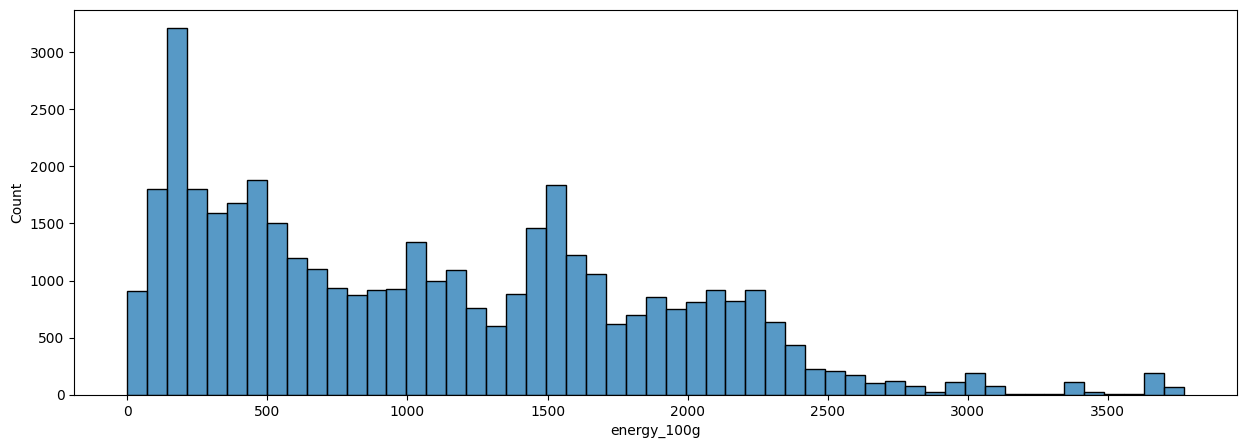

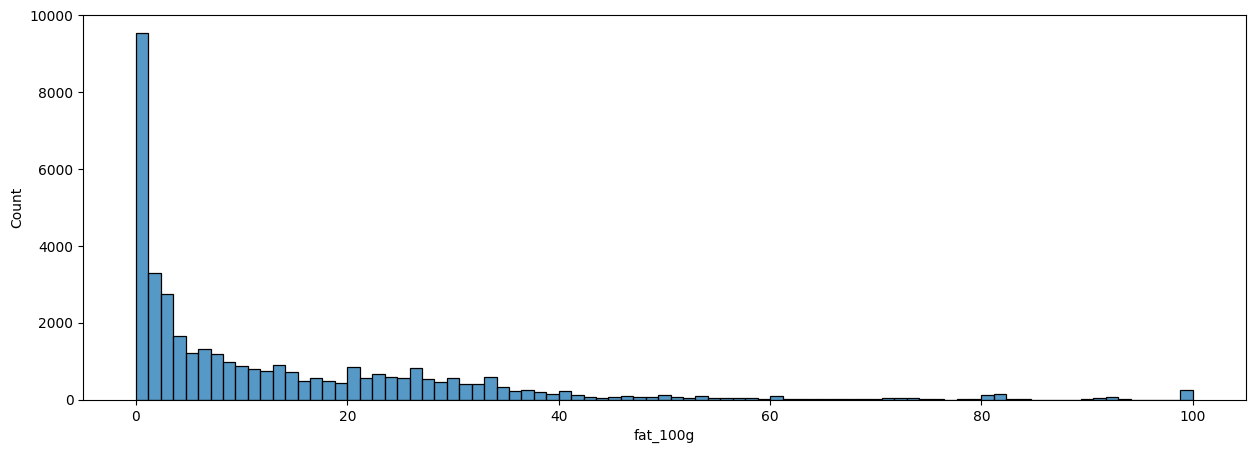

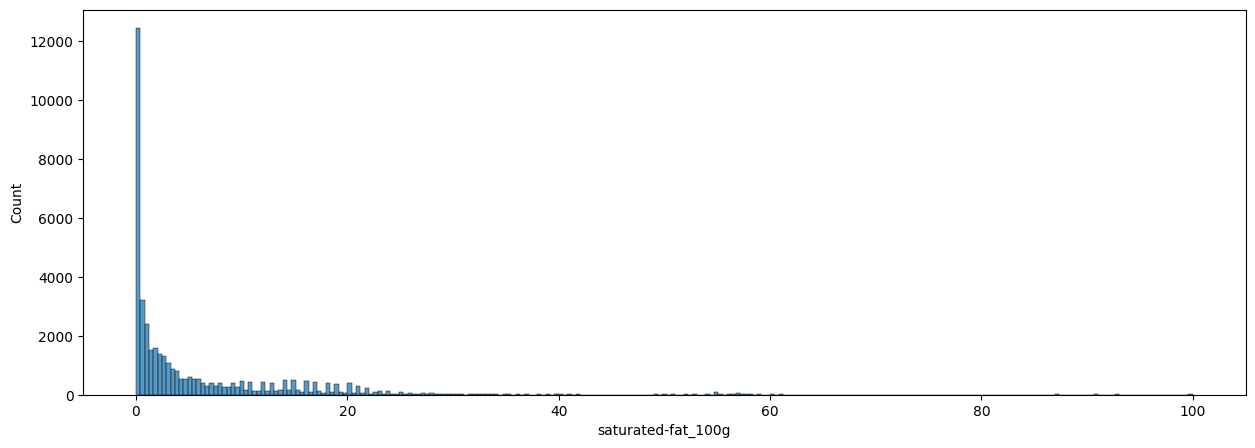

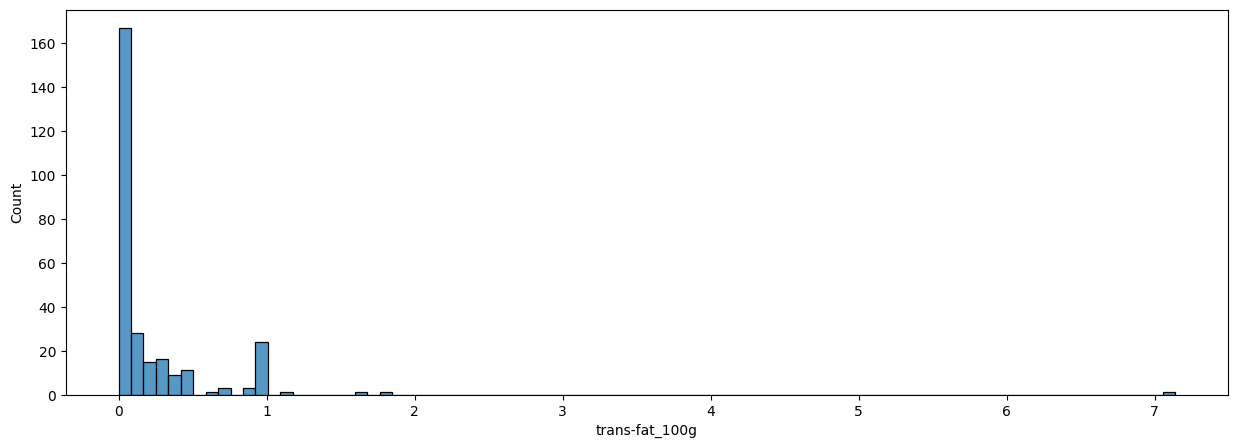

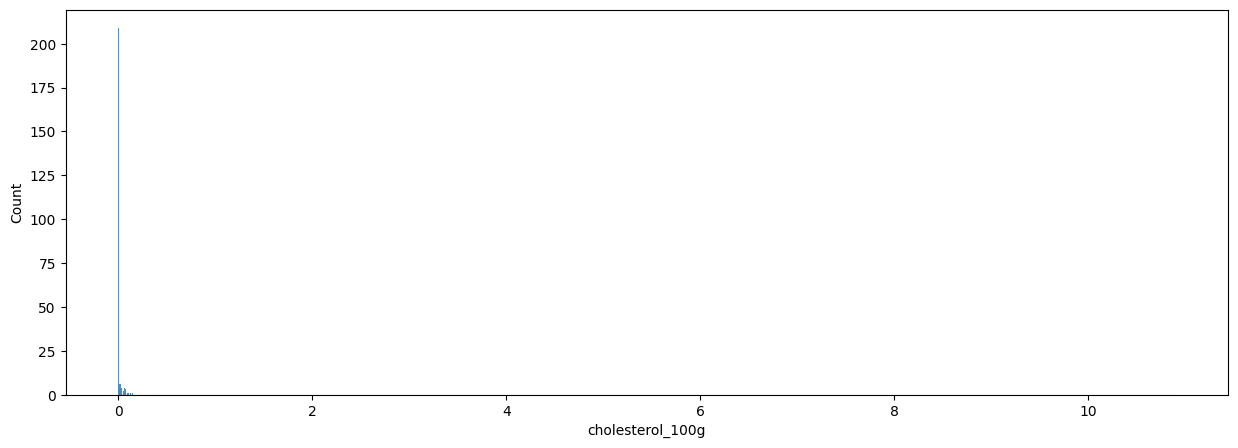

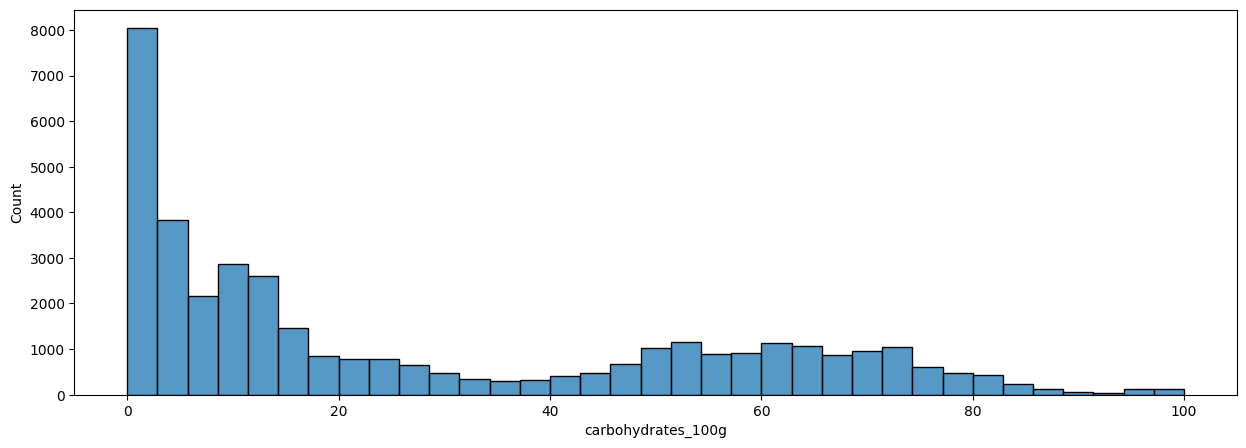

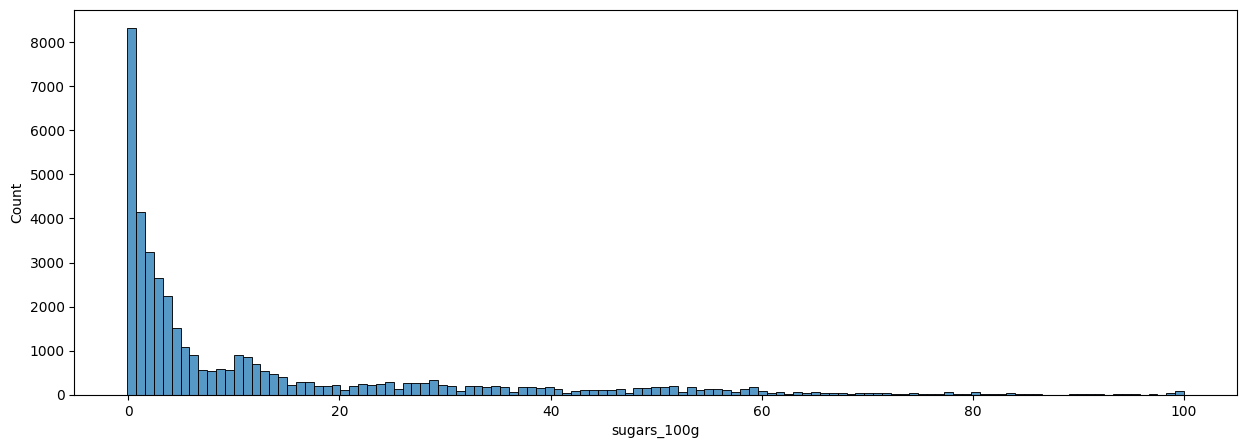

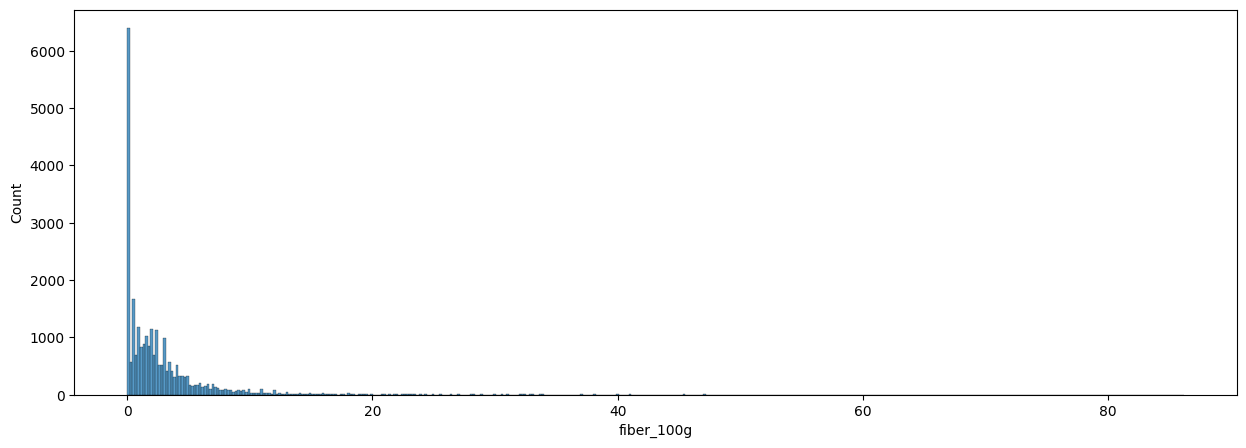

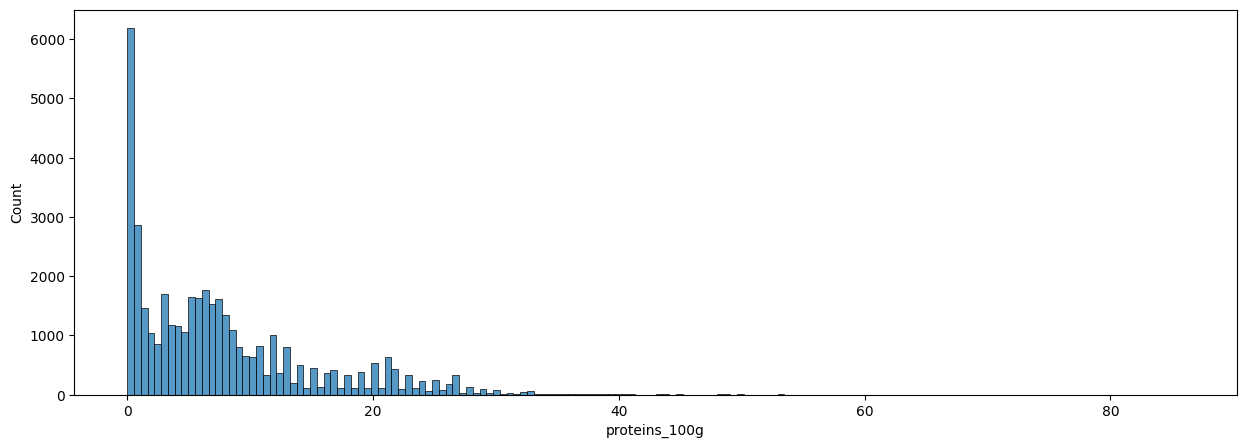

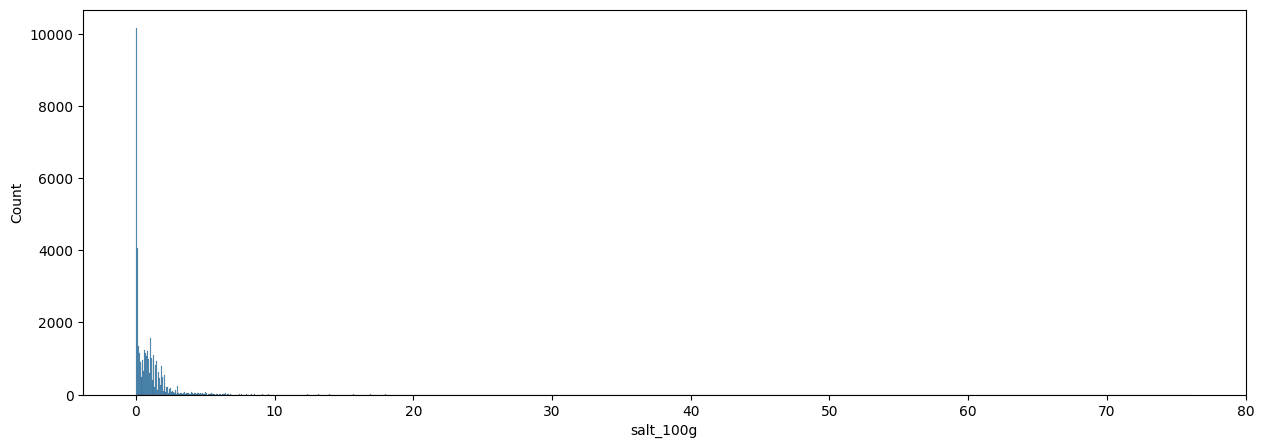

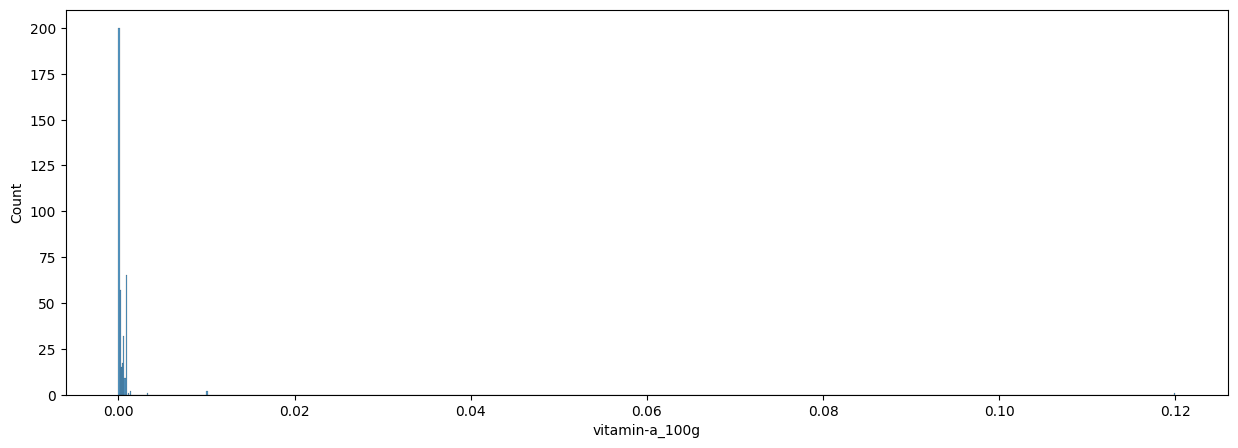

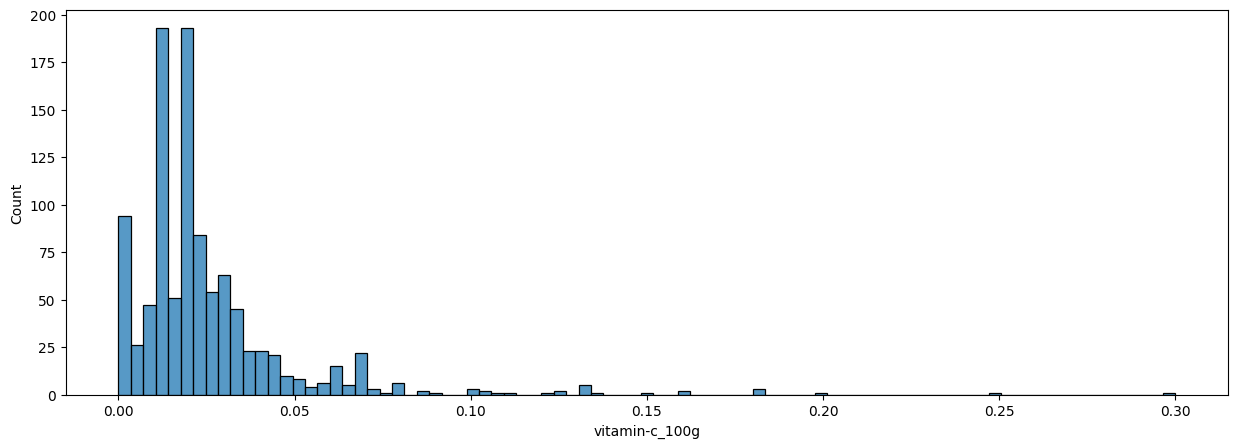

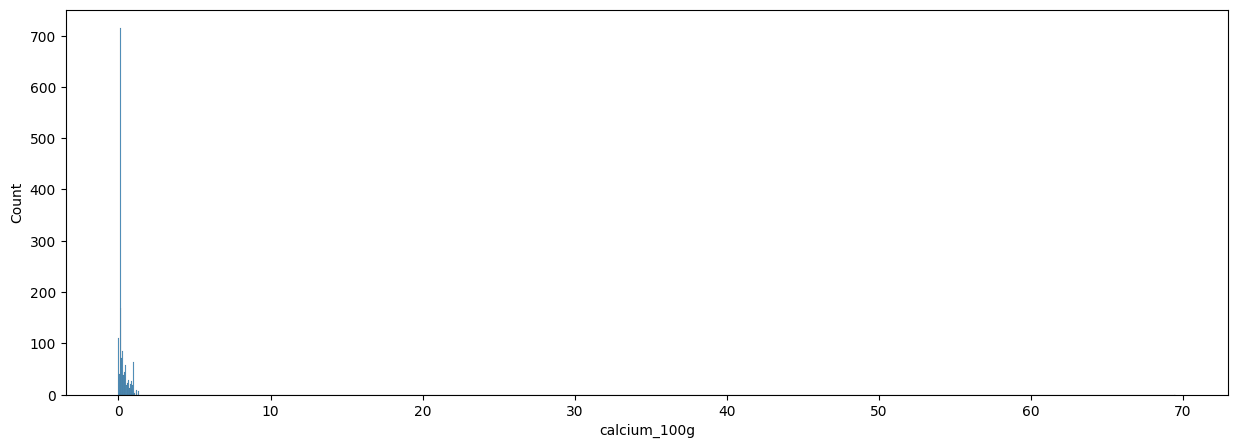

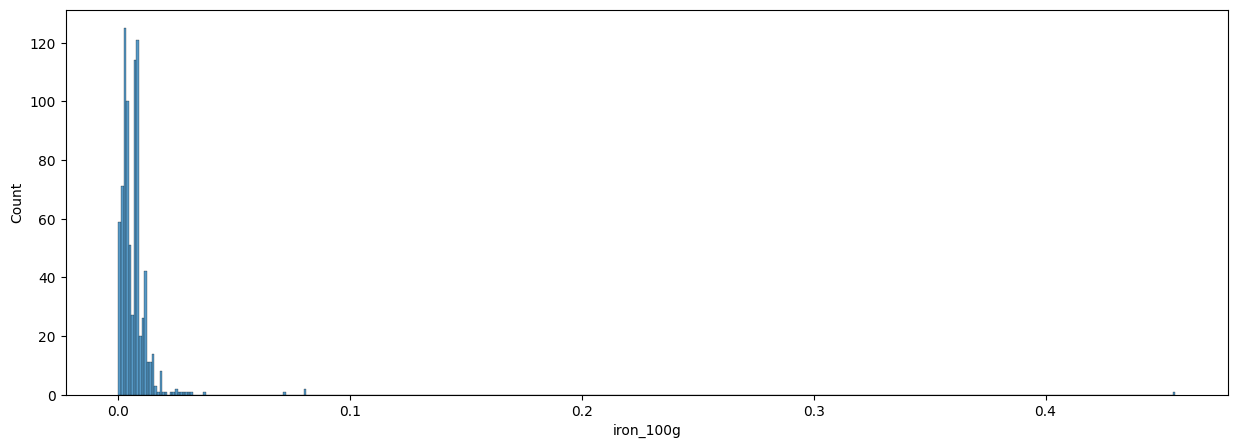

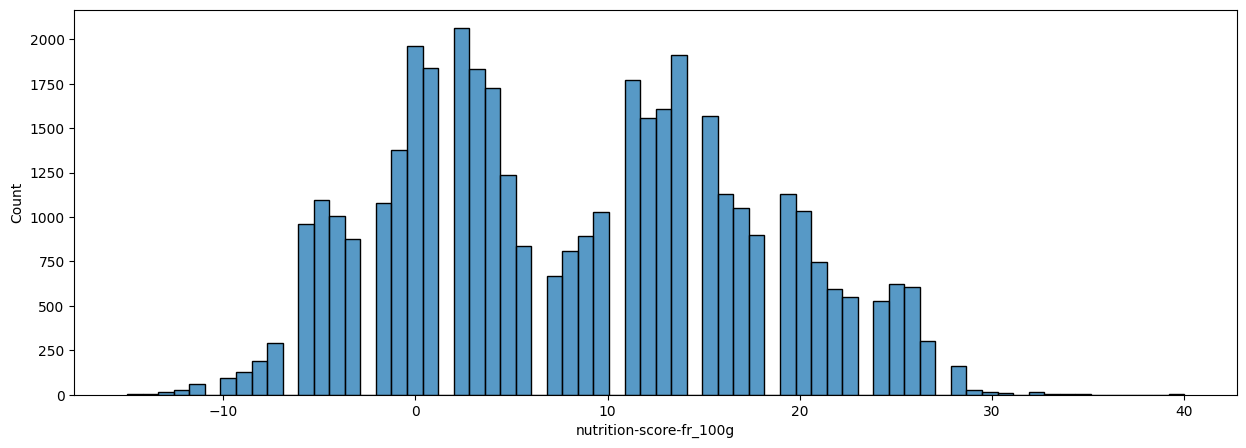

In [ ]:
# distribution avant imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_food_fr, x=col)

In [ ]:
# Analyse des moyennes et ecart-type avant imputation de la moyenne globale
df_food_fr.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,40740.000000,38315.000000,40489.000000,281.000000,291.000000,38272.000000,40487.000000,26206.000000,40711.000000,40516.000000,402.000000,1025.000000,1700.000000,821.000000,39921.000000
mean,1091.156513,13.349455,5.334556,0.218260,0.052925,27.333711,12.751730,2.602062,7.602364,0.870214,0.000651,0.025328,0.322521,0.007028,8.382731
std,785.618871,17.205514,8.325561,0.533713,0.639267,27.283932,18.378052,3.717281,7.323215,1.471746,0.006016,0.026030,1.701763,0.016913,9.079902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,395.000000,1.200000,0.280000,0.000000,0.000000,4.000000,1.000000,0.300000,1.500000,0.060000,0.000110,0.012000,0.120000,0.002800,1.000000
50%,1000.000000,6.500000,1.800000,0.000000,0.000000,14.000000,4.000000,1.600000,6.000000,0.560000,0.000140,0.020000,0.130000,0.005800,8.000000
75%,1640.000000,21.200000,7.300000,0.276000,0.010000,53.000000,15.500000,3.400000,11.000000,1.200000,0.000602,0.030000,0.393500,0.008000,15.000000
max,3772.000000,100.000000,100.000000,7.140000,10.900000,100.000000,100.000000,86.200000,86.000000,76.200000,0.120000,0.300000,69.500000,0.456000,40.000000


In [ ]:
# Imputation de la moyenne général
df_mean_brut = df_food_fr.fillna(df_food_fr[col_nutri].mean())

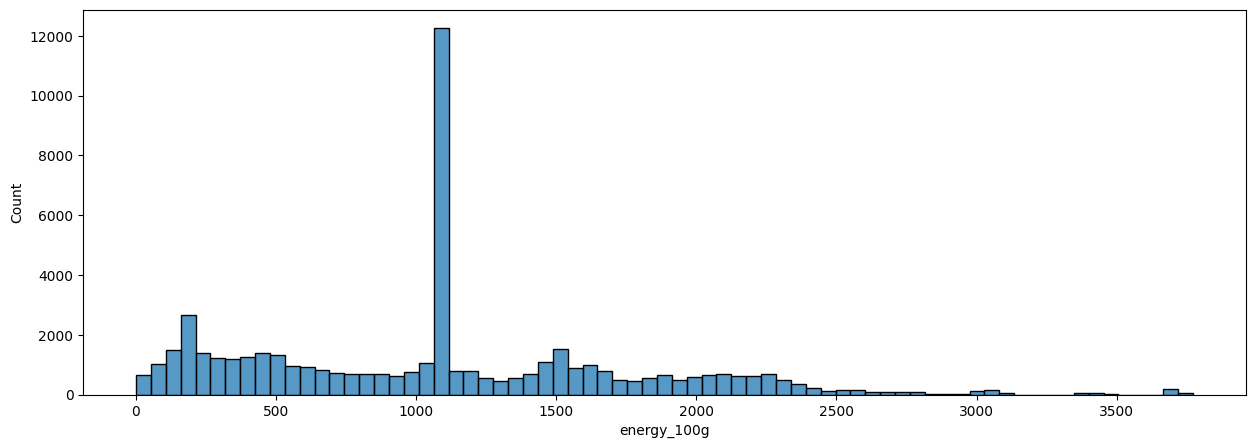

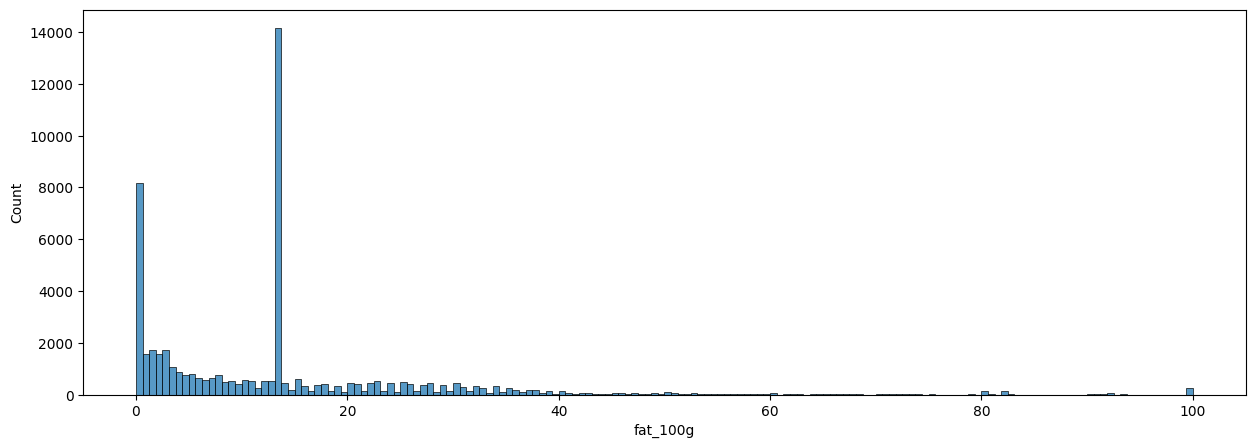

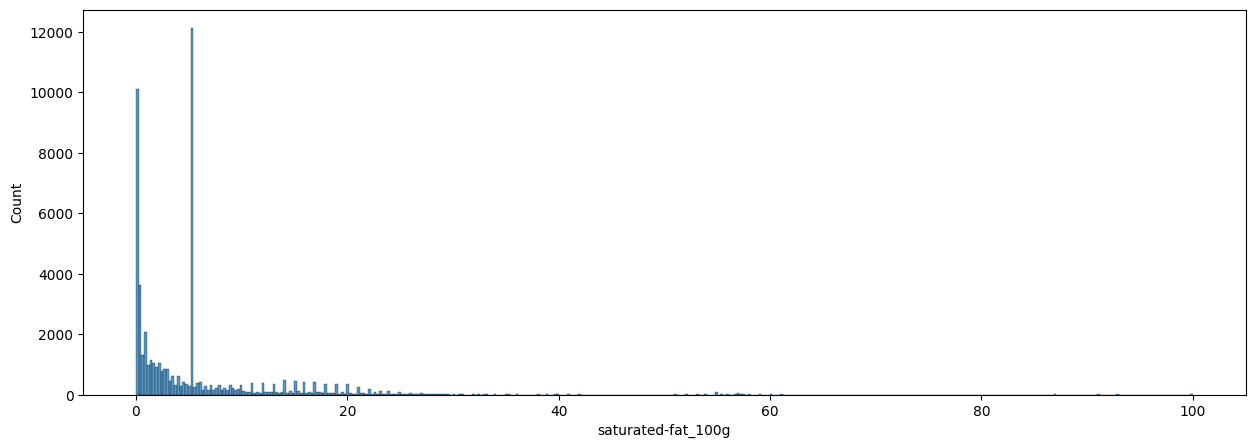

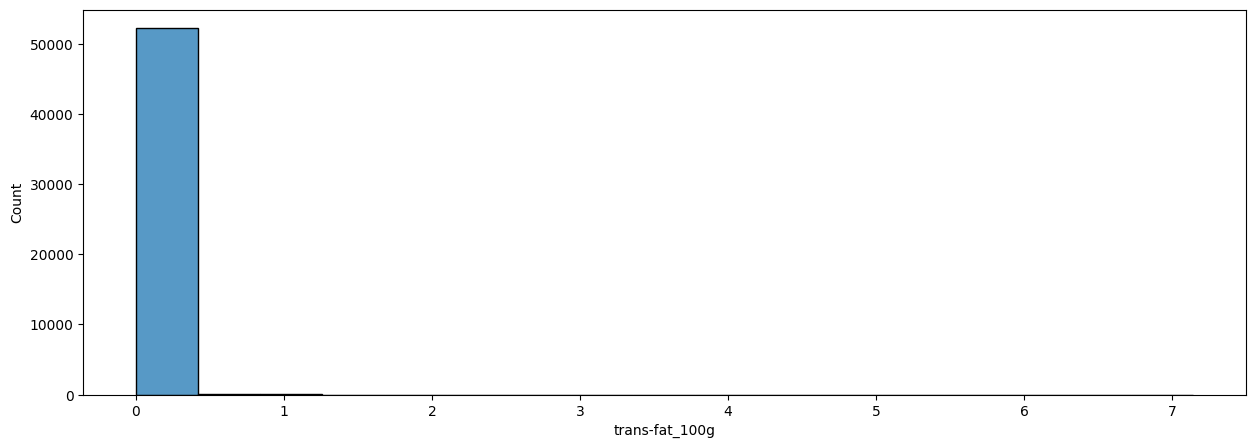

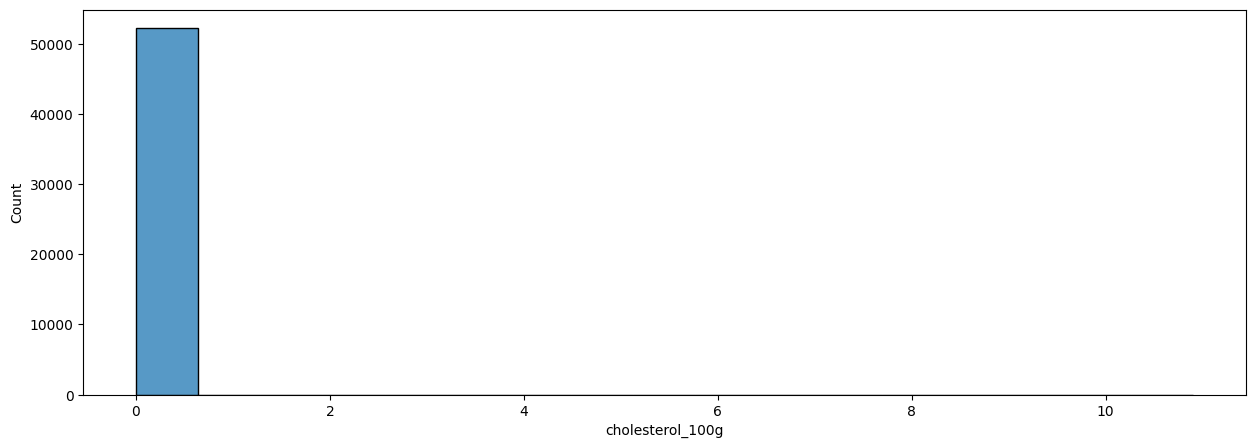

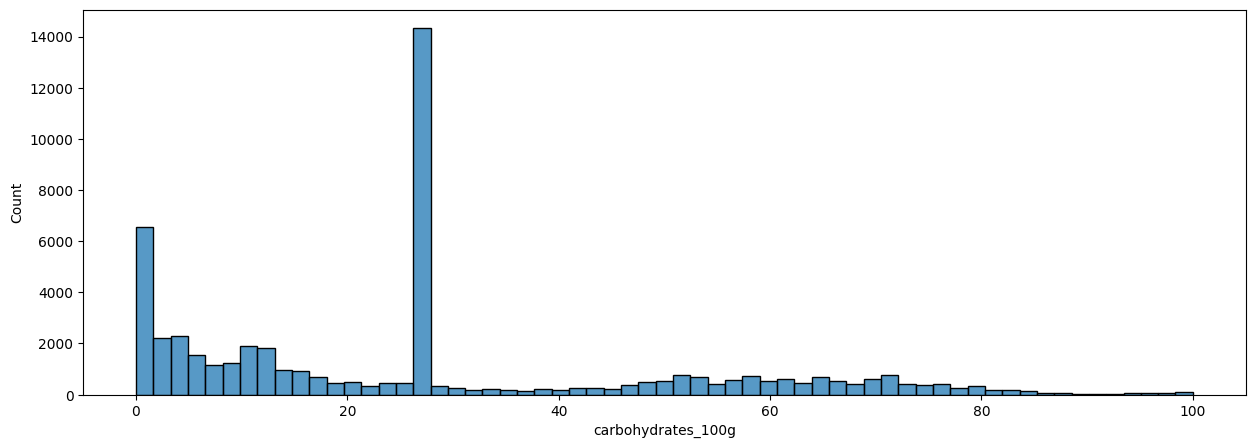

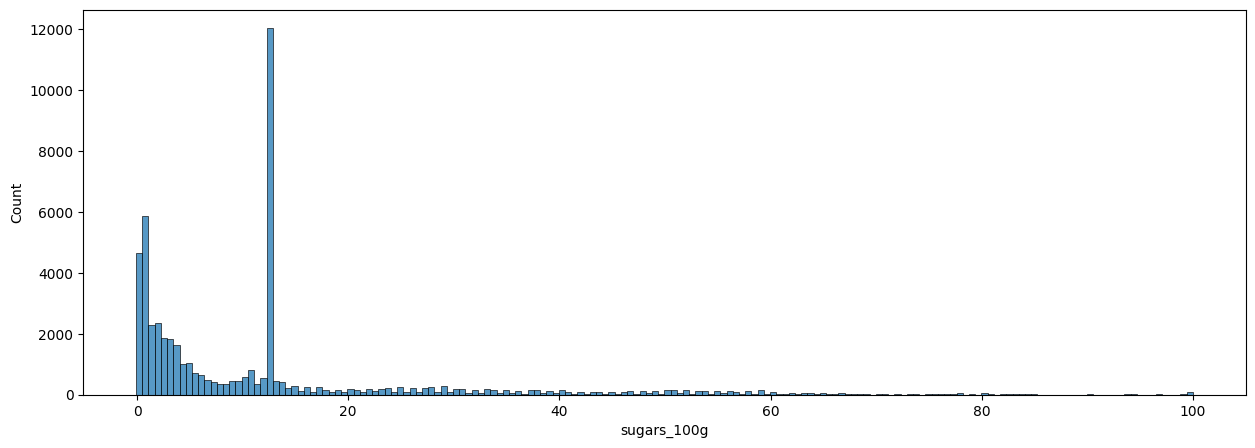

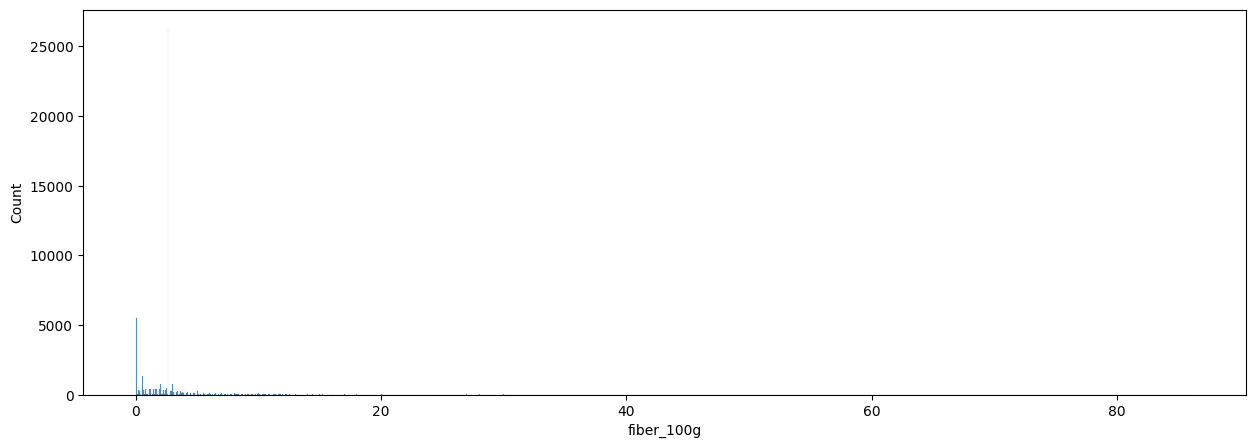

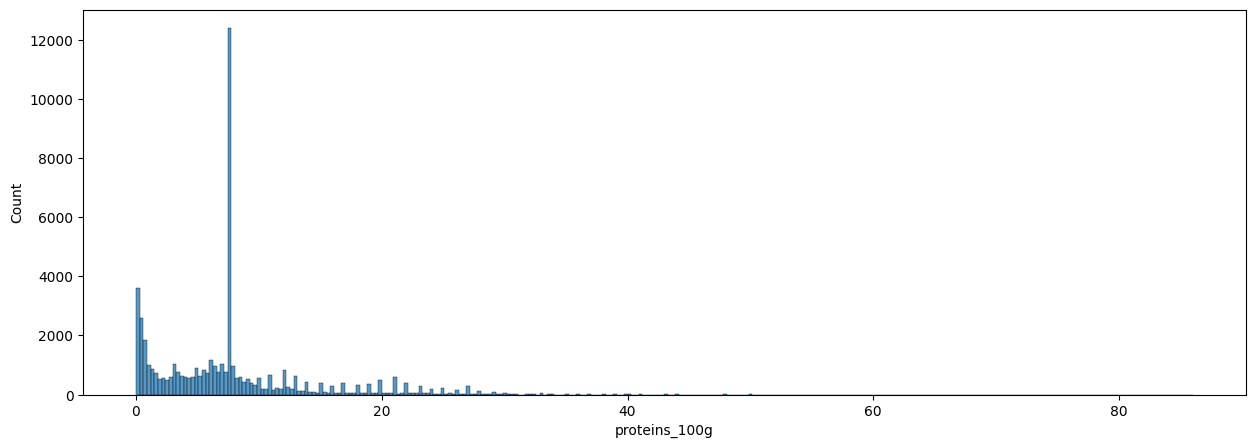

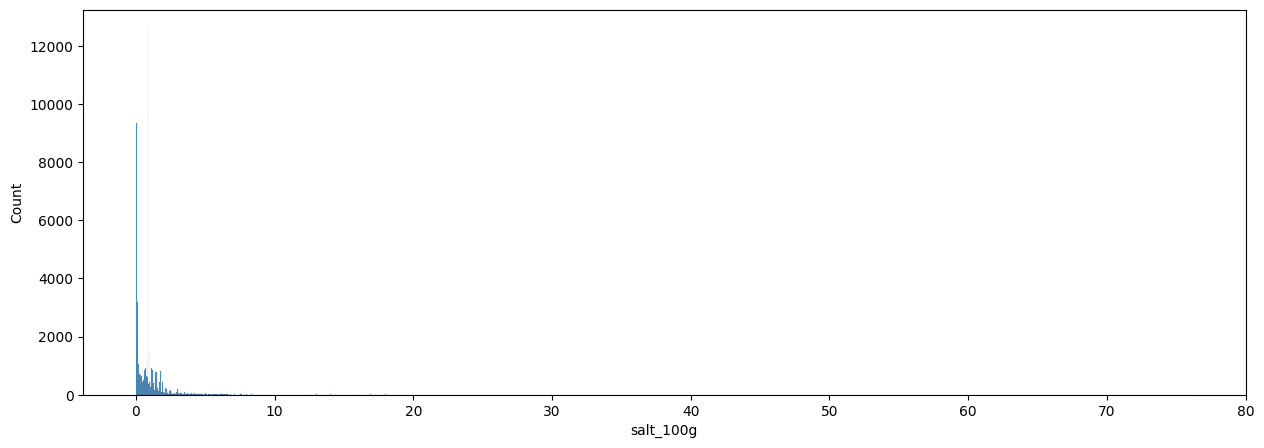

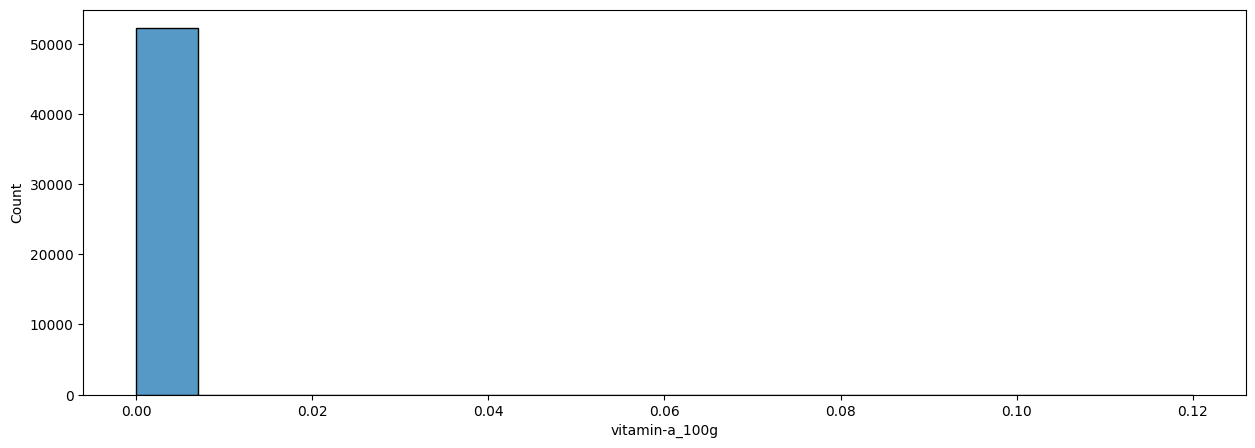

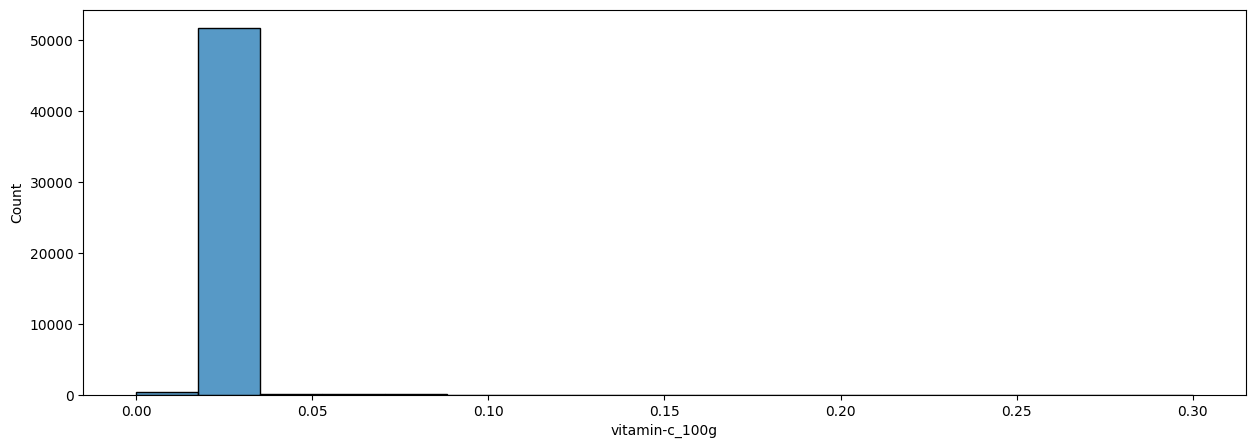

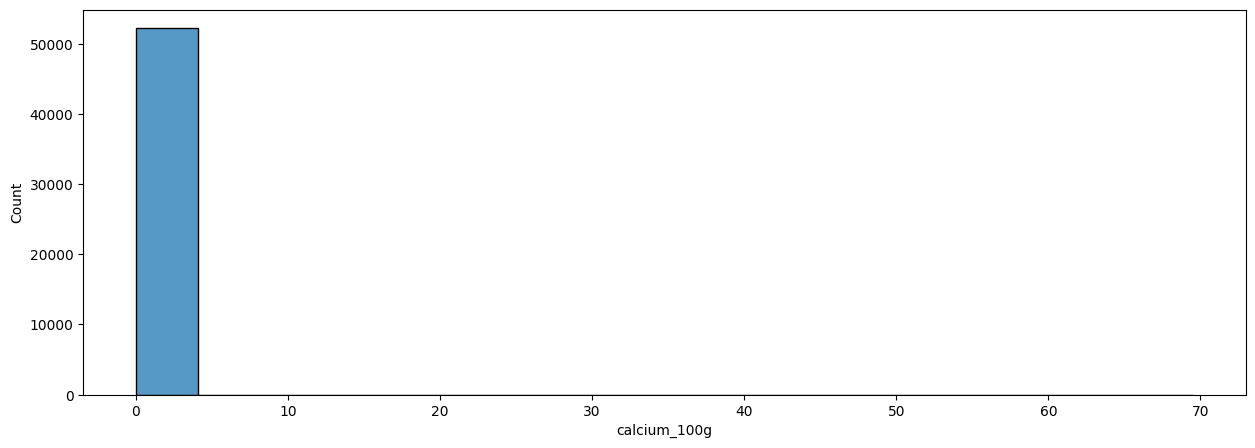

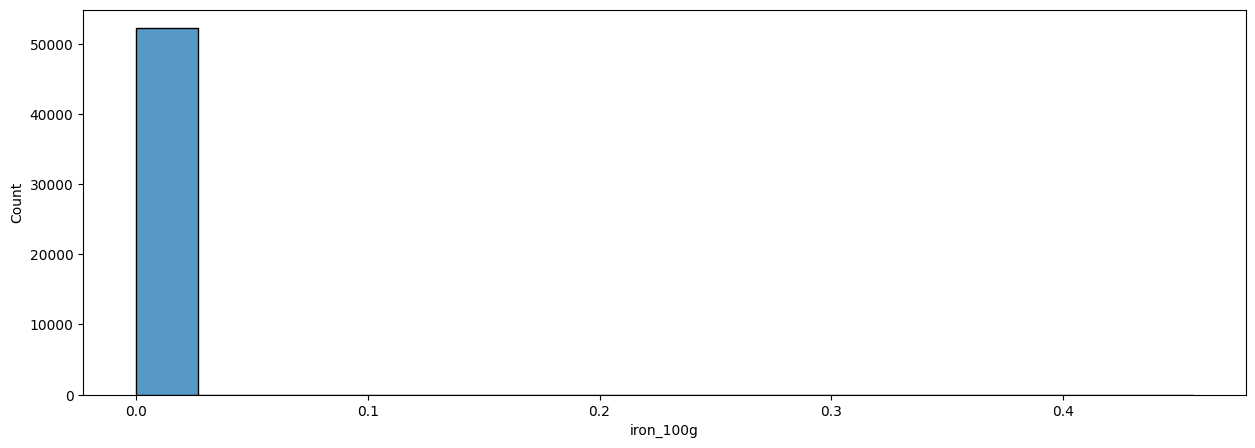

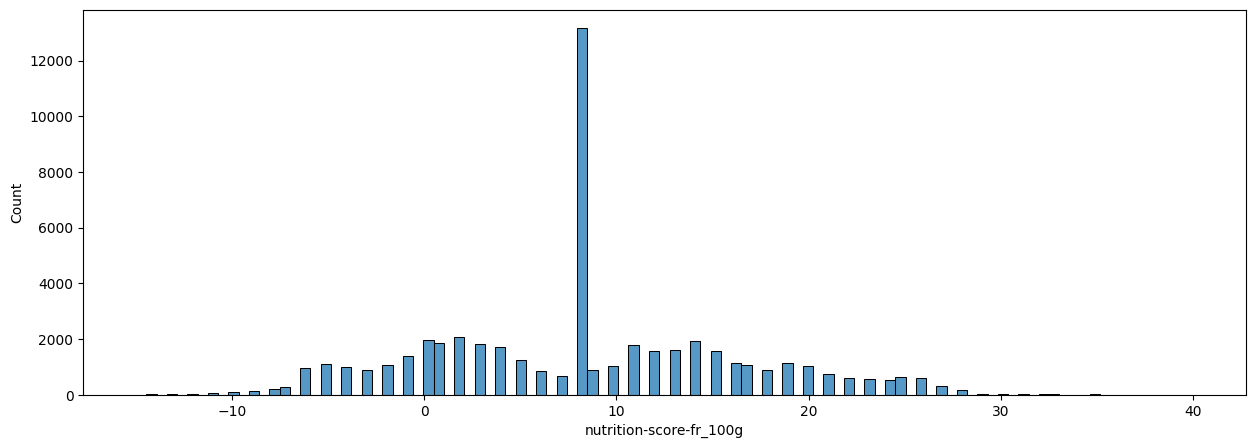

In [ ]:
# Distribution après imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_mean_brut, x=col)

In [ ]:
# Distribution après imputation de la moyenne globale
df_mean_brut.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000
mean,1091.156513,13.349455,5.334556,0.218260,0.052925,27.333711,12.751730,2.602062,7.602364,0.870214,0.000651,0.025328,0.322521,0.007028,8.382731
std,693.504526,14.729181,7.326708,0.039059,0.047612,23.343936,16.172759,2.631781,6.462262,1.295606,0.000527,0.003643,0.306781,0.002118,7.934300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,506.500000,2.500000,0.500000,0.218260,0.052925,7.100000,1.700000,1.600000,3.000000,0.113000,0.000651,0.025328,0.322521,0.007028,3.000000
50%,1091.156513,13.349455,3.900000,0.218260,0.052925,27.333711,9.600000,2.602062,7.602364,0.870214,0.000651,0.025328,0.322521,0.007028,8.382731
75%,1502.000000,14.200000,5.334556,0.218260,0.052925,37.900000,12.751730,2.602062,8.600000,1.000000,0.000651,0.025328,0.322521,0.007028,13.000000
max,3772.000000,100.000000,100.000000,7.140000,10.900000,100.000000,100.000000,86.200000,86.000000,76.200000,0.120000,0.300000,69.500000,0.456000,40.000000


In [ ]:
df_food_fr.shape

(52281, 24)

## PNNS_GROUPS_2 - Imputation des valeurs manquantes

In [ ]:
df_food_fr[col_nutri].isnull().mean()

energy_100g                0.220749
fat_100g                   0.267133
saturated-fat_100g         0.225550
trans-fat_100g             0.994625
cholesterol_100g           0.994434
carbohydrates_100g         0.267956
sugars_100g                0.225589
fiber_100g                 0.498747
proteins_100g              0.221304
salt_100g                  0.225034
vitamin-a_100g             0.992311
vitamin-c_100g             0.980394
calcium_100g               0.967483
iron_100g                  0.984296
nutrition-score-fr_100g    0.236415
dtype: float64

In [ ]:
col_nutri

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [ ]:
# Calcul de la moyenne des groupes de nutrition
pnns_mean = df_food_fr.loc[:, ["pnns_groups_2"] + list(col_nutri)].groupby(by="pnns_groups_2").mean()

In [ ]:
# Imputation de la valeurs moyennes pour chaque groupe
for group, means in pnns_mean.iterrows():
    mask = (df_food_fr["pnns_groups_2"] == group)
    df_food_fr.loc[mask,col_nutri] = df_food_fr.loc[mask,col_nutri].fillna(means)

In [ ]:
df_food_fr.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,52281.000000,52281.000000,52281.000000,44066.000000,50195.000000,52281.000000,52281.000000,52281.000000,52281.000000,52281.000000,47859.000000,47962.000000,45152.000000,46048.000000,52281.000000
mean,1059.963248,12.931202,5.196910,0.120089,0.047347,25.939612,12.672478,2.199689,7.604120,0.865877,0.000745,0.016356,0.235037,0.004011,8.193086
std,757.855015,16.405409,7.878969,0.172310,0.135319,26.326173,17.854667,2.932984,7.207585,1.352160,0.001864,0.018563,0.383252,0.003602,8.622749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,401.000000,1.600000,0.400000,0.008571,0.000053,3.900000,1.100000,0.452694,1.512370,0.100000,0.000116,0.001000,0.125986,0.001516,1.000000
50%,975.020343,7.017280,2.210000,0.114444,0.009331,12.800000,4.158079,1.439144,6.000000,0.570000,0.000137,0.011268,0.189406,0.003179,7.000000
75%,1560.000000,19.941926,6.748363,0.144250,0.044000,52.000000,15.969143,3.074797,11.000000,1.272540,0.000244,0.022509,0.224422,0.006642,14.000000
max,3772.000000,100.000000,100.000000,7.140000,10.900000,100.000000,100.000000,86.200000,86.000000,76.200000,0.120000,0.300000,69.500000,0.456000,40.000000


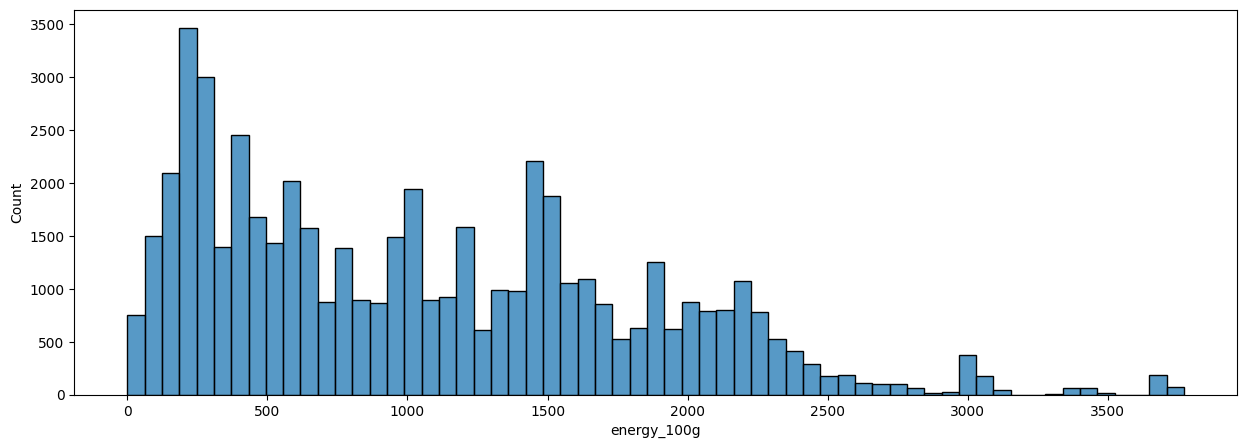

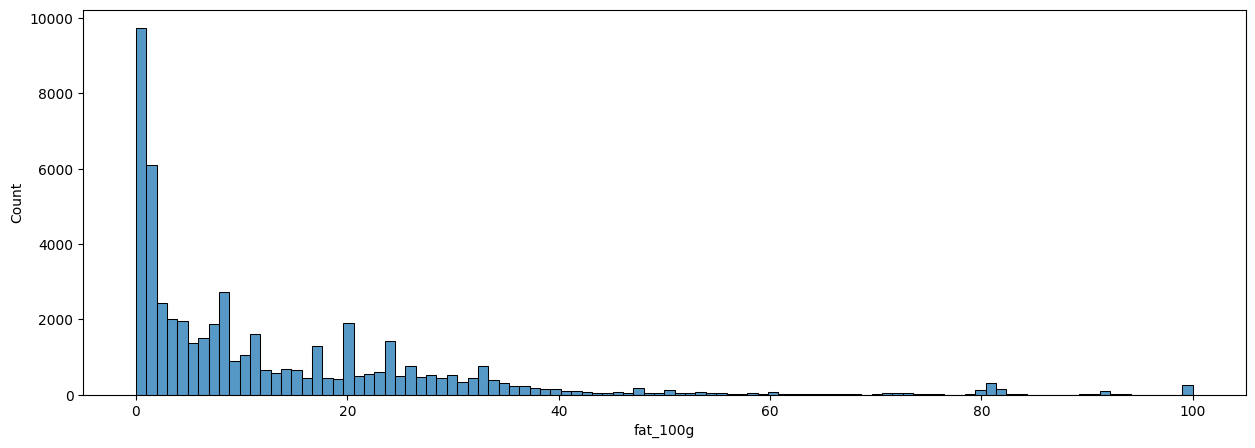

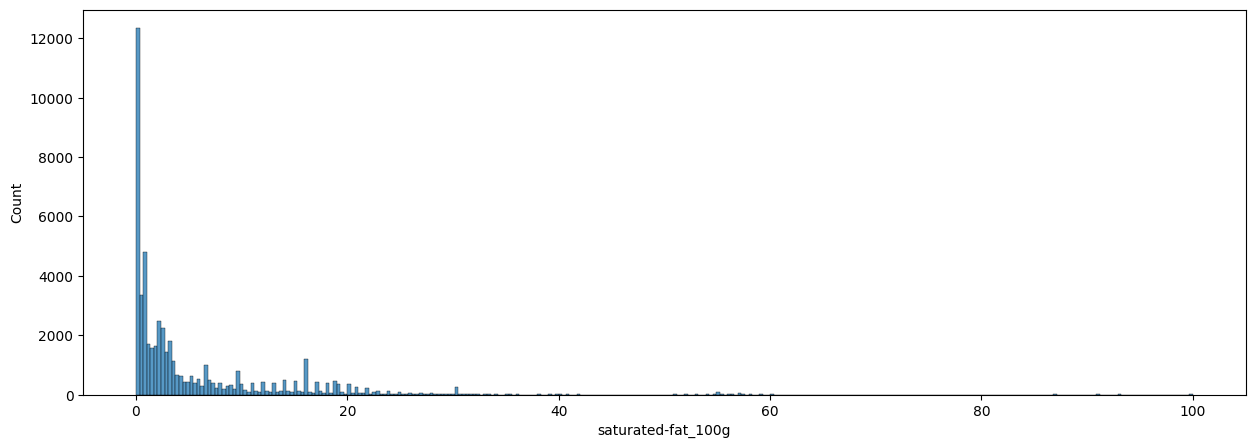

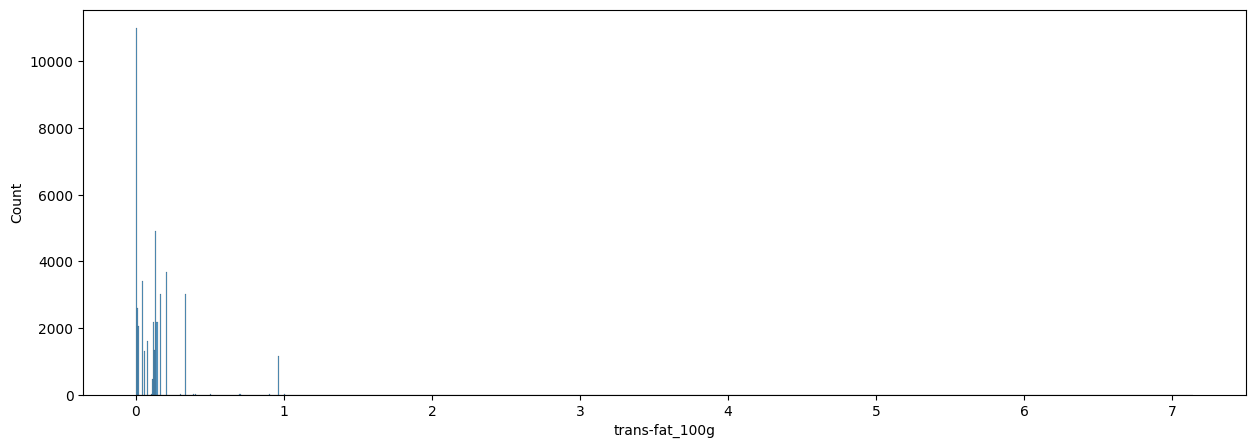

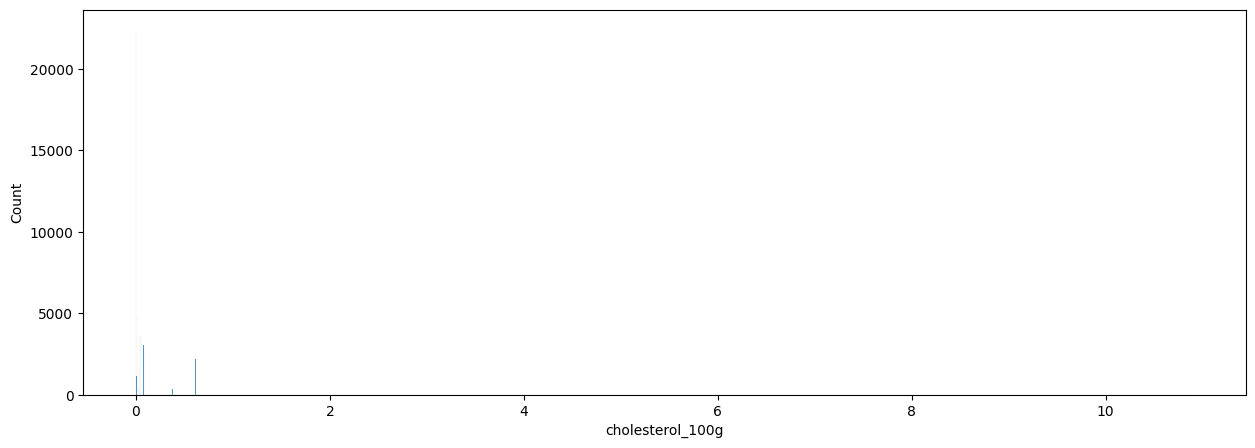

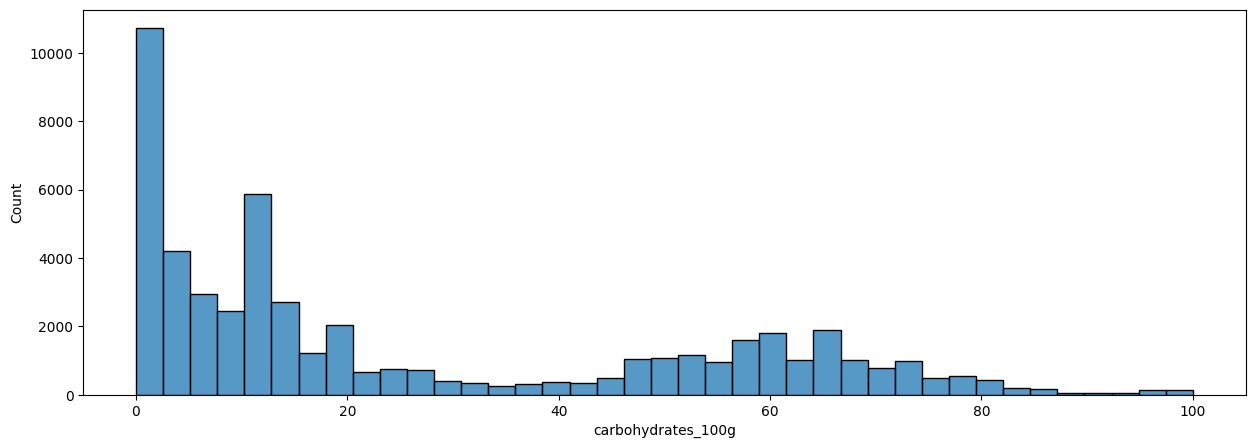

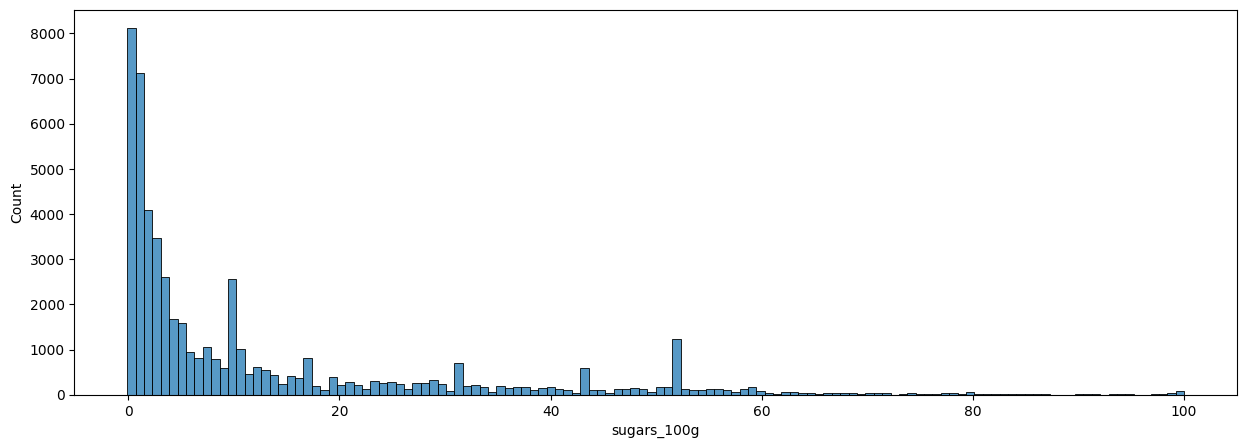

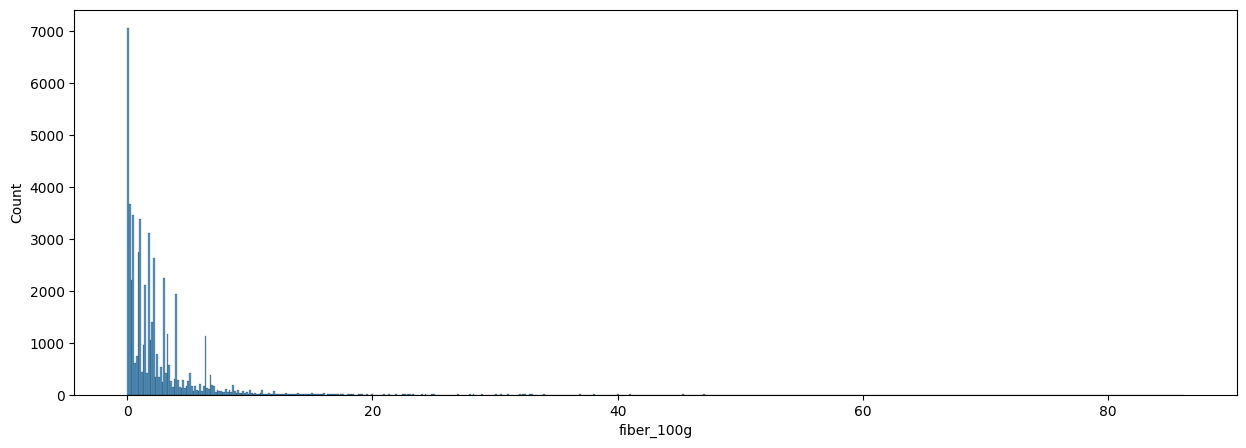

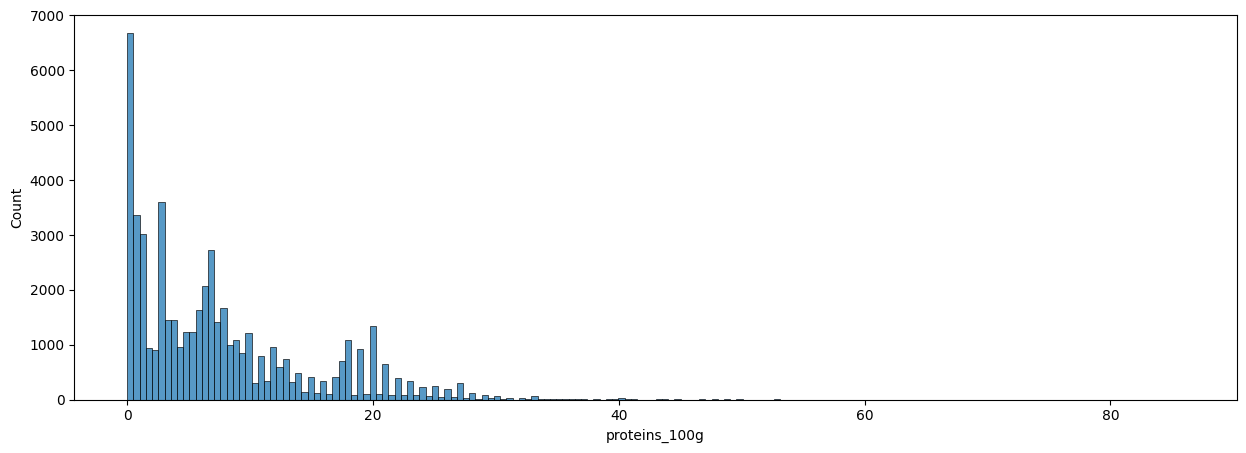

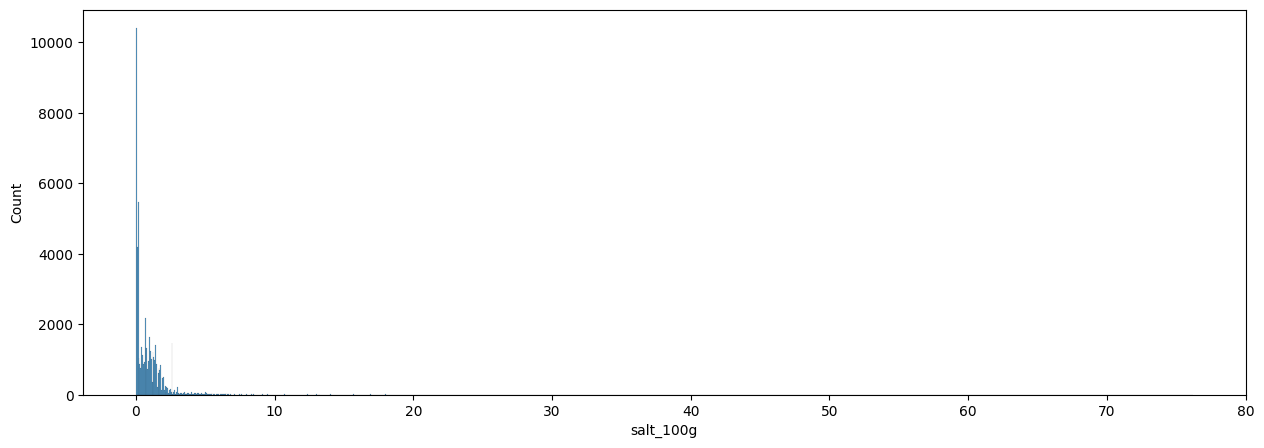

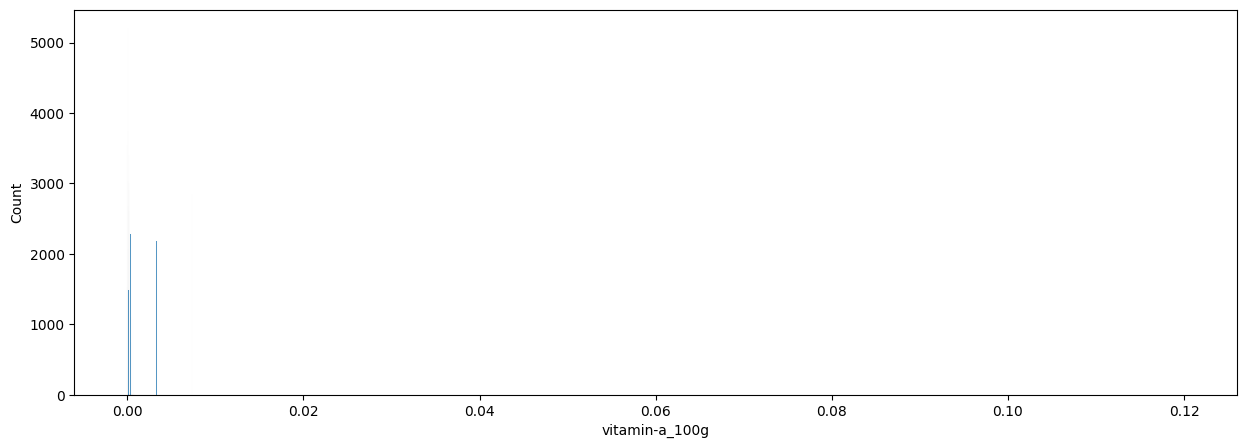

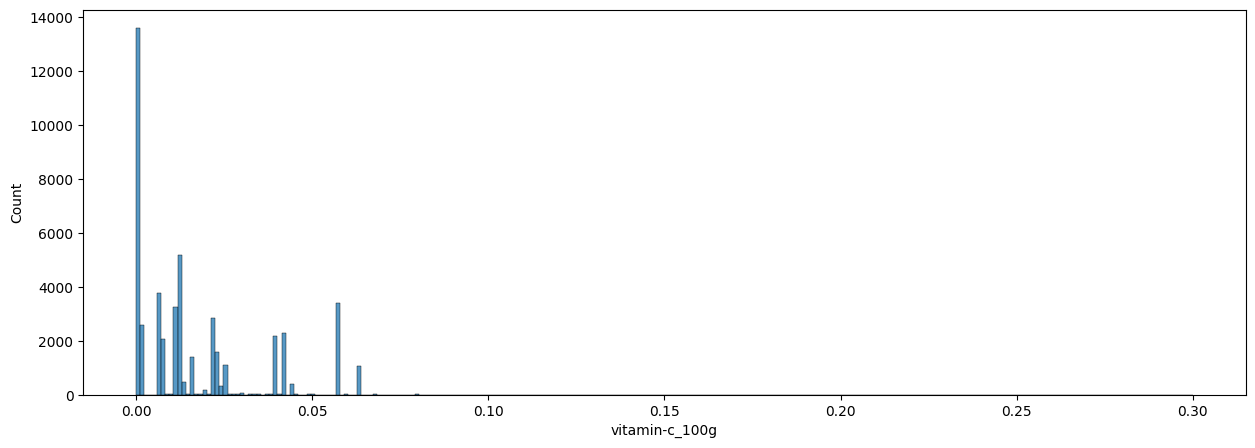

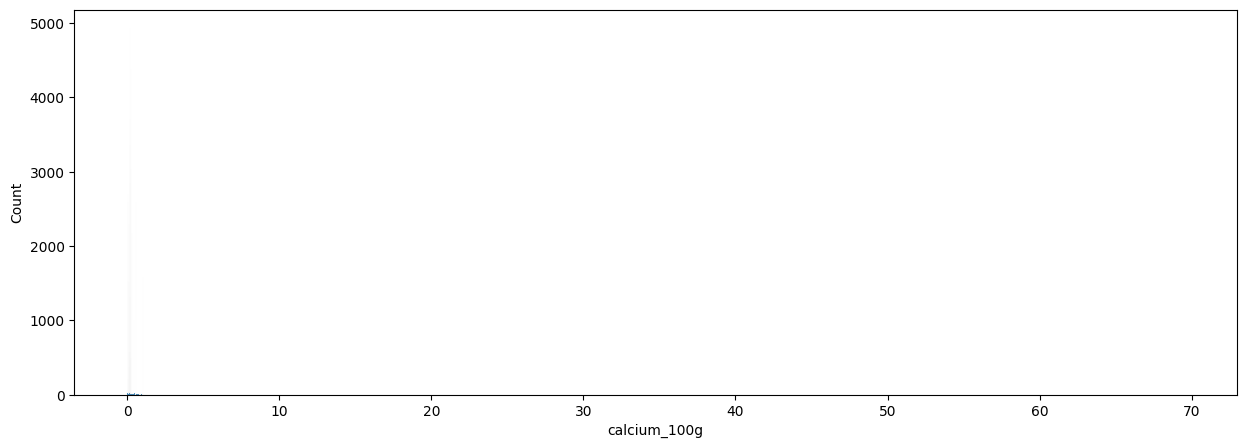

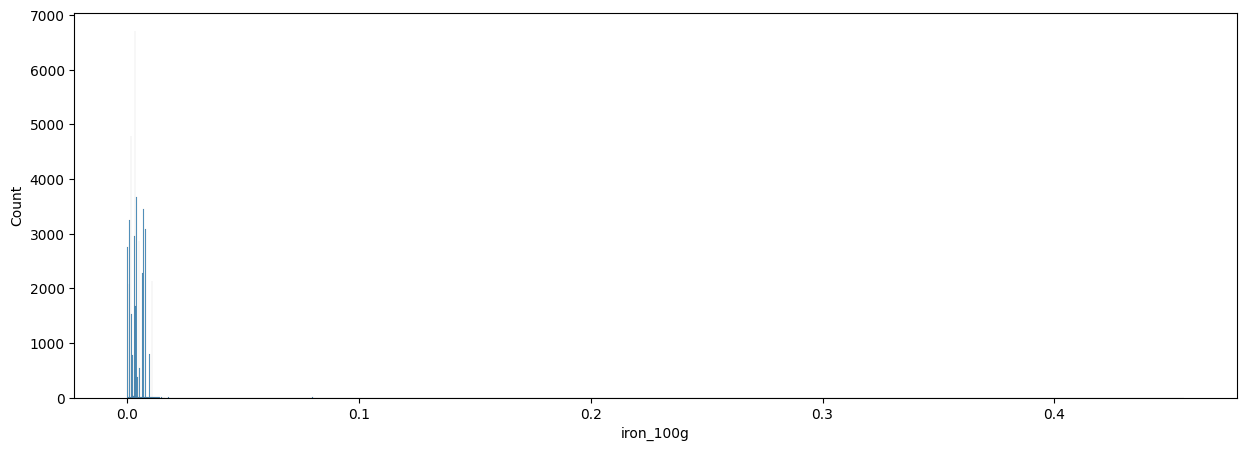

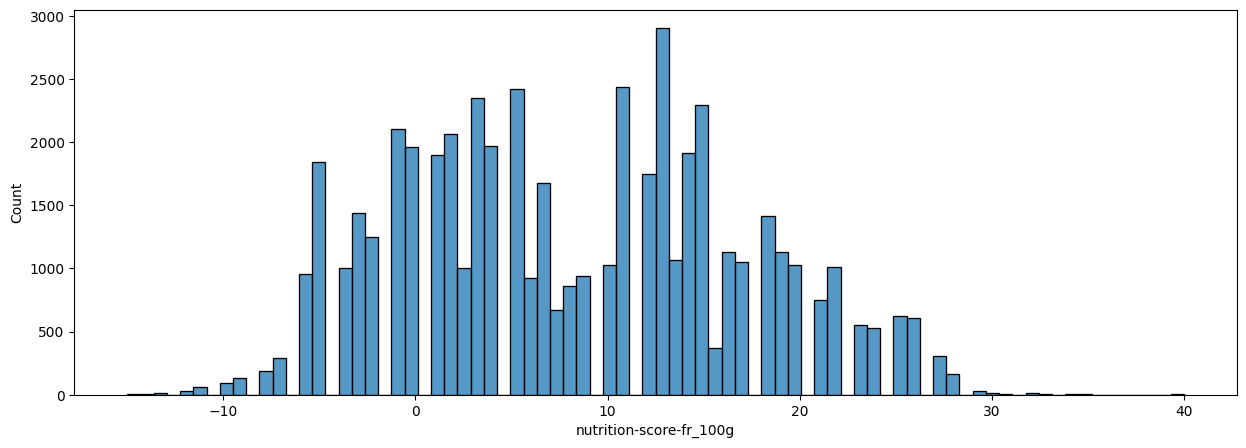

In [ ]:
# distribution avant imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_food_fr, x=col)

## **<h1 id='test'>1. Description des données</h1>**
***